# Final Python Assignment - Philippos Michael_RegNo:160130043

### Population Data and CO2 emmisions Data

#### Creation of graphical representations of Population/Urban density data and also CO2 emmisions with categorisation of contributors, throughout the timespan of more than 30 years

##### The purpose of this assignment is to study the Population of countries and cross-examine them with the urban density. In this way one can figure out if there is indeed an increase in population and witness if there is a rise in urbanization. As it has been widely discussed, all the more people move into cities, abandoning the outskirts and increasing the urban density. This data analysis can help verify this hypothesis. Based on this first exploration, this study will move on to analyse the CO2 emmissions throught the period of 30 years in terms of quantity and in terms of categorisation as well (these countries and timeframe coexist in both the Population Data and CO2 emmissions Data). One of the 5 categories of CO2 emmissions tis of particular interest, the CO2 emmissions caused by Construction Industry. Based on a hypothesis that increase in urban density also increases demand for more and larger buildings to be constructed thus increasing in turn the CO2 emmission caused by the construction industries, this assignment will help examine the basis of it.

### Part1: Population data

In [1]:
#importing libraries
import pandas as pd
import math

In [2]:
df1 = pd.read_csv('WDI_Data_Countries.csv', header=0, encoding = "ISO-8859-1")   #importing csv dataframe

In [3]:
df1   #Printing Dataframe

Country Name Country Code  \
0       Afghanistan          AFG   
1       Afghanistan          AFG   
2       Afghanistan          AFG   
3       Afghanistan          AFG   
4       Afghanistan          AFG   
5       Afghanistan          AFG   
6       Afghanistan          AFG   
7       Afghanistan          AFG   
8       Afghanistan          AFG   
9       Afghanistan          AFG   
10      Afghanistan          AFG   
11      Afghanistan          AFG   
12      Afghanistan          AFG   
13      Afghanistan          AFG   
14      Afghanistan          AFG   
15      Afghanistan          AFG   
16      Afghanistan          AFG   
17      Afghanistan          AFG   
18      Afghanistan          AFG   
19      Afghanistan          AFG   
20      Afghanistan          AFG   
21      Afghanistan          AFG   
22      Afghanistan          AFG   
23      Afghanistan          AFG   
24      Afghanistan          AFG   
25      Afghanistan          AFG   
26      Afghanistan          AFG   
27      Afghanistan          AFG   
28      Afghanistan          AFG   
29      Afghanistan          AFG   
...             ...          ...   
313752     Zimbabwe          ZWE   
313753     Zimbabwe          ZWE   
313754     Zimbabwe          ZWE   
313755     Zimbabwe          ZWE   
313756     Zimbabwe          ZWE   
313757     Zimbabwe          ZWE   
313758     Zimbabwe          ZWE   
313759     Zimbabwe          ZWE   
313760     Zimbabwe          ZWE   
313761     Zimbabwe          ZWE   
313762     Zimbabwe          ZWE   
313763     Zimbabwe          ZWE   
313764     Zimbabwe          ZWE   
313765     Zimbabwe          ZWE   
313766     Zimbabwe          ZWE   
313767     Zimbabwe          ZWE   
313768     Zimbabwe          ZWE   
313769     Zimbabwe          ZWE   
313770     Zimbabwe          ZWE   
313771     Zimbabwe          ZWE   
313772     Zimbabwe          ZWE   
313773     Zimbabwe          ZWE   
313774     Zimbabwe          ZWE   
313775     Zimbabwe          ZWE   
313776     Zimbabwe          ZWE   
313777     Zimbabwe          ZWE   
313778     Zimbabwe          ZWE   
313779     Zimbabwe          ZWE   
313780     Zimbabwe          ZWE   
313781     Zimbabwe          ZWE   

                                           Indicator Name  \
0       2005 PPP conversion factor, GDP (LCU per inter...   
1       2005 PPP conversion factor, private consumptio...   
2                 Access to electricity (% of population)   
3       Access to electricity, rural (% of rural popul...   
4       Access to electricity, urban (% of urban popul...   
5              Access to non-solid fuel (% of population)   
6       Access to non-solid fuel, rural (% of rural po...   
7       Access to non-solid fuel, urban (% of urban po...   
8       Account at a financial institution (% age 15+)...   
9       Account at a financial institution, female (% ...   
10      Account at a financial institution, income, po...   
11      Account at a financial institution, income, ri...   
12      Account at a financial institution, male (% ag...   
13      Adequacy of social insurance programs (% of to...   
14      Adequacy of social protection and labor progra...   
15      Adequacy of social safety net programs (% of t...   
16      Adequacy of unemployment benefits and ALMP (% ...   
17      Adjusted net enrollment rate, primary, female ...   
18      Adjusted net enrollment rate, primary, male (%...   
19      Adjusted net enrolment rate, primary, both sex...   
20         Adjusted net national income (annual % growth)   
21       Adjusted net national income (constant 2010 US$)   
22             Adjusted net national income (current US$)   
23      Adjusted net national income per capita (annua...   
24      Adjusted net national income per capita (const...   
25      Adjusted net national income per capita (curre...   
26      Adjusted net savings, excluding particulate em...   
27      Adjusted net savings, excluding particulate em...   
28   

In [4]:
#organising the Urban Population Density Dataframe

dfUrbanPop = df1[df1['Indicator Name'] ==  "Urban population"]    #create a new DF, which contains only urban population rows

#delete unnecessary columns
del dfUrbanPop['Indicator Name']
del dfUrbanPop['Country Name']
del dfUrbanPop['Country Code']
del dfUrbanPop['Indicator Code']

dfUrbanPop.dropna(axis=0, how='all', inplace=True)    #delete all rows that contain only null values
dfUrbanPop.dropna(axis='columns', how='all',inplace=True) #delete all columns that contain only null values
dfUrbanPop.dropna(axis=0, how='any', inplace=True)    #delete all rows that contain any null value

#importing csv dataframe
df2 = pd.read_csv('WDI_Data_Countries.csv',usecols=['Country Name','Indicator Name'], header=0, encoding = "ISO-8859-1")   

#merging the two dataframes to reacquire the deleted columns
dfUrbanPop = pd.merge(df2,dfUrbanPop, right_index=True, left_index=True) 
dfUrbanPop

C:\Users\philip\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\philip\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\philip\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Country Name    Indicator Name         1960         1961  \
1417                 Afghanistan  Urban population     739000.0     780000.0   
2863                     Albania  Urban population     494000.0     514000.0   
4309                     Algeria  Urban population    3390000.0    3630000.0   
5755              American Samoa  Urban population      13300.0      13600.0   
7201                     Andorra  Urban population       7840.0       8770.0   
8647                      Angola  Urban population     550000.0     580000.0   
10093        Antigua and Barbuda  Urban population      21700.0      21600.0   
11539                  Argentina  Urban population   15200000.0   15600000.0   
12985                    Armenia  Urban population     958000.0    1010000.0   
14431                      Aruba  Urban population      27500.0      28100.0   
15877                  Australia  Urban population    8380000.0    8590000.0   
17323                    Austria  Urban population    4560000.0    4590000.0   
18769                 Azerbaijan  Urban population    2050000.0    2110000.0   
20215               Bahamas, The  Urban population      65400.0      69600.0   
21661                    Bahrain  Urban population     134000.0     138000.0   
23107                 Bangladesh  Urban population    2480000.0    2620000.0   
24553                   Barbados  Urban population      84900.0      85400.0   
25999                    Belarus  Urban population    2660000.0    2770000.0   
27445                    Belgium  Urban population    8460000.0    8500000.0   
28891                     Belize  Urban population      49700.0      50900.0   
30337                      Benin  Urban population     226000.0     243000.0   
31783                    Bermuda  Urban population      44400.0      45500.0   
33229                     Bhutan  Urban population       8060.0       8700.0   
34675                    Bolivia  Urban population    1360000.0    1400000.0   
36121     Bosnia and Herzegovina  Urban population     612000.0     645000.0   
37567                   Botswana  Urban population      16000.0      16600.0   
39013                     Brazil  Urban population   33400000.0   35200000.0   
40459     British Virgin Islands  Urban population        983.0       1030.0   
41905          Brunei Darussalam  Urban population      35500.0      38800.0   
43351                   Bulgaria  Urban population    2920000.0    3080000.0   
...                          ...               ...          ...          ...   
270373                 Swaziland  Urban population      13700.0      15500.0   
271819                    Sweden  Urban population    5430000.0    5510000.0   
273265               Switzerland  Urban population    2720000.0    2810000.0   
274711      Syrian Arab Republic  Urban population    1690000.0    1770000.0   
276157                Tajikistan  Urban population     685000.0     718000.0   
277603                  Tanzania  Urban population     529000.0     560000.0   
279049                  Thailand  Urban population    5390000.0    5580000.0   
280495               Timor-Leste  Urban population      50400.0      52100.0   
281941                      Togo  Urban population     160000.0     175000.0   
283387                     Tonga  Urban population      10800.0      11400.0   
284833       Trinidad and Tobago  Urban population     147000.0     145000.0   
286279                   Tunisia  Urban population    1580000.0    1620000.0   
287725                    Turkey  Urban population    8680000.0    9050000.0   
289171              Turkmenistan  Urban population     740000.0     768000.0   
290617  Turks and Caicos Islands  Urban population       2730.0       2770.0   
292063                    Tuvalu  Urban population        970.0       1030.0   
293509                    Uganda  Urban population     300000.0     323000.0   
294955                   Ukraine  Urban population   20000000.0   20500000.0   
296401      United A

In [5]:
#repeating the same procedure for the Population Dataframe

dfPop = df1[df1['Indicator Name'] ==  "Population, total"]      
del dfPop['Indicator Name']
del dfPop['Country Name']
del dfPop['Country Code']
del dfPop['Indicator Code']
dfPop.dropna(axis=0, how='all', inplace=True) 
dfPop.dropna(axis='columns', how='all',inplace=True)
dfPop.dropna(axis=0, how='any', inplace=True) 
df2 = pd.read_csv('WDI_Data_Countries.csv',usecols=['Country Name','Indicator Name'], header=0, encoding = "ISO-8859-1")  
dfPop = pd.merge(df2,dfPop, right_index=True, left_index=True)
dfPop

C:\Users\philip\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\philip\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\philip\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Country Name     Indicator Name         1960         1961  \
1045                 Afghanistan  Population, total    8990000.0    9160000.0   
2491                     Albania  Population, total    1610000.0    1660000.0   
3937                     Algeria  Population, total   11100000.0   11400000.0   
5383              American Samoa  Population, total      20000.0      20500.0   
6829                     Andorra  Population, total      13400.0      14400.0   
8275                      Angola  Population, total    5270000.0    5370000.0   
9721         Antigua and Barbuda  Population, total      54700.0      55400.0   
11167                  Argentina  Population, total   20600000.0   21000000.0   
12613                    Armenia  Population, total    1870000.0    1930000.0   
14059                      Aruba  Population, total      54200.0      55400.0   
15505                  Australia  Population, total   10300000.0   10500000.0   
16951                    Austria  Population, total    7050000.0    7090000.0   
18397                 Azerbaijan  Population, total    3900000.0    4030000.0   
19843               Bahamas, The  Population, total     110000.0     115000.0   
21289                    Bahrain  Population, total     163000.0     168000.0   
22735                 Bangladesh  Population, total   48200000.0   49600000.0   
24181                   Barbados  Population, total     231000.0     232000.0   
25627                    Belarus  Population, total    8200000.0    8270000.0   
27073                    Belgium  Population, total    9150000.0    9180000.0   
28519                     Belize  Population, total      92100.0      94700.0   
29965                      Benin  Population, total    2430000.0    2470000.0   
31411                    Bermuda  Population, total      44400.0      45500.0   
32857                     Bhutan  Population, total     224000.0     229000.0   
34303                    Bolivia  Population, total    3690000.0    3760000.0   
35749     Bosnia and Herzegovina  Population, total    3210000.0    3280000.0   
37195                   Botswana  Population, total     524000.0     537000.0   
38641                     Brazil  Population, total   72500000.0   74700000.0   
40087     British Virgin Islands  Population, total       8040.0       8160.0   
41533          Brunei Darussalam  Population, total      81800.0      85700.0   
42979                   Bulgaria  Population, total    7870000.0    7940000.0   
...                          ...                ...          ...          ...   
270001                 Swaziland  Population, total     349000.0     358000.0   
271447                    Sweden  Population, total    7480000.0    7520000.0   
272893               Switzerland  Population, total    5330000.0    5430000.0   
274339      Syrian Arab Republic  Population, total    4590000.0    4740000.0   
275785                Tajikistan  Population, total    2060000.0    2140000.0   
277231                  Tanzania  Population, total   10100000.0   10400000.0   
278677                  Thailand  Population, total   27400000.0   28200000.0   
280123               Timor-Leste  Population, total     500000.0     508000.0   
281569                      Togo  Population, total    1580000.0    1600000.0   
283015                     Tonga  Population, total      61600.0      63700.0   
284461       Trinidad and Tobago  Population, total     848000.0     865000.0   
285907                   Tunisia  Population, total    4220000.0    4280000.0   
287353                    Turkey  Population, total   27600000.0   28200000.0   
288799              Turkmenistan  Population, total    1590000.0    1650000.0   
290245  Turks and Caicos Islands  Population, total       5720.0       5760.0   
291691                    Tuvalu  Population, total       6100.0       6240.0   
293137                    Uganda  Population, total    6790000.0    7010000.0   
294583                   Ukraine  Population, total

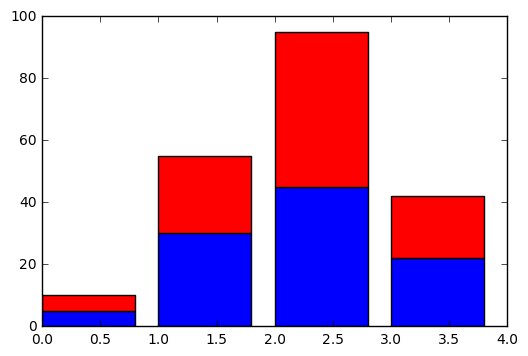

In [6]:
#Plotting stacked bar charts example, taken unchanged by: https://www.safaribooksonline.com/library/view/matplotlib-plotting-cookbook/9781849513265/ch01s10.html

import matplotlib.pyplot as plt

A = [5., 30., 45., 22.]
B = [5., 25., 50., 20.]

X = range(4)

plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r', bottom = A)
plt.show()

In [7]:
#creating a duplicate column of the countries names, for both dataframes(Population & Urban Density)

name = dfPop['Country Name']
nameurban=dfUrbanPop['Country Name']
dfUrbanPop.insert(0, 'Name', nameurban)
dfPop.insert(0, 'Name', name)
dfPop

Name              Country Name     Indicator Name  \
1045                 Afghanistan               Afghanistan  Population, total   
2491                     Albania                   Albania  Population, total   
3937                     Algeria                   Algeria  Population, total   
5383              American Samoa            American Samoa  Population, total   
6829                     Andorra                   Andorra  Population, total   
8275                      Angola                    Angola  Population, total   
9721         Antigua and Barbuda       Antigua and Barbuda  Population, total   
11167                  Argentina                 Argentina  Population, total   
12613                    Armenia                   Armenia  Population, total   
14059                      Aruba                     Aruba  Population, total   
15505                  Australia                 Australia  Population, total   
16951                    Austria                   Austria  Population, total   
18397                 Azerbaijan                Azerbaijan  Population, total   
19843               Bahamas, The              Bahamas, The  Population, total   
21289                    Bahrain                   Bahrain  Population, total   
22735                 Bangladesh                Bangladesh  Population, total   
24181                   Barbados                  Barbados  Population, total   
25627                    Belarus                   Belarus  Population, total   
27073                    Belgium                   Belgium  Population, total   
28519                     Belize                    Belize  Population, total   
29965                      Benin                     Benin  Population, total   
31411                    Bermuda                   Bermuda  Population, total   
32857                     Bhutan                    Bhutan  Population, total   
34303                    Bolivia                   Bolivia  Population, total   
35749     Bosnia and Herzegovina    Bosnia and Herzegovina  Population, total   
37195                   Botswana                  Botswana  Population, total   
38641                     Brazil                    Brazil  Population, total   
40087     British Virgin Islands    British Virgin Islands  Population, total   
41533          Brunei Darussalam         Brunei Darussalam  Population, total   
42979                   Bulgaria                  Bulgaria  Population, total   
...                          ...                       ...                ...   
270001                 Swaziland                 Swaziland  Population, total   
271447                    Sweden                    Sweden  Population, total   
272893               Switzerland               Switzerland  Population, total   
274339      Syrian Arab Republic      Syrian Arab Republic  Population, total   
275785                Tajikistan                Tajikistan  Population, total   
277231                  Tanzania                  Tanzania  Population, total   
278677                  Thailand                  Thailand  Population, total   
280123               Timor-Leste               Timor-Leste  Population, total   
281569                      Togo                      Togo  Population, total   
283015                     Tonga                     Tonga  Population, total   
284461       Trinidad and Tobago       Trinidad and Tobago  Population, total   
285907                   Tunisia                   Tunisia  Population, total   
287353                    Turkey                    Turkey  Population, total   
288799              Turkmenistan              Turkmenistan  Population, total   
290245  Turks and Caicos Islands  Turks and Caicos Islands  Population, total   
291691                    Tuvalu                    Tuvalu  Population, total   
293137                    Uganda                    Uganda  Population, total   
294583                   Ukraine                   Ukraine 

In [8]:
#Setting the index as the duplicated names column

dfPop= dfPop.set_index(['Name'])
dfUrbanPop= dfUrbanPop.set_index(['Name'])

In [9]:
#Merging the two dataframes to get only common countries and discart the countries with data from only one of the two dfs

dfUrbanPopIndex = dfUrbanPop[[]]  #instead of merging the two dfs, a new df is created with only the index of the Urban Density df, so as not to mix values in the dfs
dfPop= pd.merge(dfPop,dfUrbanPopIndex, right_index=True, left_index=True)

dfPop

Country Name     Indicator Name  \
Name                                                                    
Afghanistan                            Afghanistan  Population, total   
Albania                                    Albania  Population, total   
Algeria                                    Algeria  Population, total   
American Samoa                      American Samoa  Population, total   
Andorra                                    Andorra  Population, total   
Angola                                      Angola  Population, total   
Antigua and Barbuda            Antigua and Barbuda  Population, total   
Argentina                                Argentina  Population, total   
Armenia                                    Armenia  Population, total   
Aruba                                        Aruba  Population, total   
Australia                                Australia  Population, total   
Austria                                    Austria  Population, total   
Azerbaijan                              Azerbaijan  Population, total   
Bahamas, The                          Bahamas, The  Population, total   
Bahrain                                    Bahrain  Population, total   
Bangladesh                              Bangladesh  Population, total   
Barbados                                  Barbados  Population, total   
Belarus                                    Belarus  Population, total   
Belgium                                    Belgium  Population, total   
Belize                                      Belize  Population, total   
Benin                                        Benin  Population, total   
Bermuda                                    Bermuda  Population, total   
Bhutan                                      Bhutan  Population, total   
Bolivia                                    Bolivia  Population, total   
Bosnia and Herzegovina      Bosnia and Herzegovina  Population, total   
Botswana                                  Botswana  Population, total   
Brazil                                      Brazil  Population, total   
British Virgin Islands      British Virgin Islands  Population, total   
Brunei Darussalam                Brunei Darussalam  Population, total   
Bulgaria                                  Bulgaria  Population, total   
...                                            ...                ...   
Swaziland                                Swaziland  Population, total   
Sweden                                      Sweden  Population, total   
Switzerland                            Switzerland  Population, total   
Syrian Arab Republic          Syrian Arab Republic  Population, total   
Tajikistan                              Tajikistan  Population, total   
Tanzania                                  Tanzania  Population, total   
Thailand                                  Thailand  Population, total   
Timor-Leste                            Timor-Leste  Population, total   
Togo                                          Togo  Population, total   
Tonga                                        Tonga  Population, total   
Trinidad and Tobago            Trinidad and Tobago  Population, total   
Tunisia                                    Tunisia  Population, total   
Turkey                                      Turkey  Population, total   
Turkmenistan                          Turkmenistan  Population, total   
Turks and Caicos Islands  Turks and Caicos Islands  Population, total   
Tuvalu                                      Tuvalu  Population, total   
Uganda                                      Uganda  Population, total   
Ukraine                                    Ukraine  Population, total   
United Arab Emirates          United Arab Emirates  Population, total   
United Kingdom                      United Kingdom  Population, total   
United States                        United States  Population, total   
Uruguay                                    Uruguay  Population, total   
Uzbekistan             

In [10]:
#Deleting uneccessary columns and reindexing the dfs

del dfPop['Indicator Name']
dfPop=dfPop.reset_index(drop=True)
dfPop

Country Name         1960         1961         1962  \
0                 Afghanistan    8990000.0    9160000.0    9340000.0   
1                     Albania    1610000.0    1660000.0    1710000.0   
2                     Algeria   11100000.0   11400000.0   11700000.0   
3              American Samoa      20000.0      20500.0      21100.0   
4                     Andorra      13400.0      14400.0      15400.0   
5                      Angola    5270000.0    5370000.0    5470000.0   
6         Antigua and Barbuda      54700.0      55400.0      56300.0   
7                   Argentina   20600000.0   21000000.0   21300000.0   
8                     Armenia    1870000.0    1930000.0    2000000.0   
9                       Aruba      54200.0      55400.0      56200.0   
10                  Australia   10300000.0   10500000.0   10700000.0   
11                    Austria    7050000.0    7090000.0    7130000.0   
12                 Azerbaijan    3900000.0    4030000.0    4170000.0   
13               Bahamas, The     110000.0     115000.0     121000.0   
14                    Bahrain     163000.0     168000.0     173000.0   
15                 Bangladesh   48200000.0   49600000.0   51000000.0   
16                   Barbados     231000.0     232000.0     233000.0   
17                    Belarus    8200000.0    8270000.0    8350000.0   
18                    Belgium    9150000.0    9180000.0    9220000.0   
19                     Belize      92100.0      94700.0      97400.0   
20                      Benin    2430000.0    2470000.0    2500000.0   
21                    Bermuda      44400.0      45500.0      46600.0   
22                     Bhutan     224000.0     229000.0     235000.0   
23                    Bolivia    3690000.0    3760000.0    3840000.0   
24     Bosnia and Herzegovina    3210000.0    3280000.0    3340000.0   
25                   Botswana     524000.0     537000.0     550000.0   
26                     Brazil   72500000.0   74700000.0   77000000.0   
27     British Virgin Islands       8040.0       8160.0       8300.0   
28          Brunei Darussalam      81800.0      85700.0      89600.0   
29                   Bulgaria    7870000.0    7940000.0    8010000.0   
..                        ...          ...          ...          ...   
180                 Swaziland     349000.0     358000.0     366000.0   
181                    Sweden    7480000.0    7520000.0    7560000.0   
182               Switzerland    5330000.0    5430000.0    5570000.0   
183      Syrian Arab Republic    4590000.0    4740000.0    4900000.0   
184                Tajikistan    2060000.0    2140000.0    2220000.0   
185                  Tanzania   10100000.0   10400000.0   10700000.0   
186                  Thailand   27400000.0   28200000.0   29100000.0   
187               Timor-Leste     500000.0     508000.0     517000.0   
188                      Togo    1580000.0    1600000.0    1610000.0   
189                     Tonga      61600.0      63700.0      66300.0   
190       Trinidad and Tobago     848000.0     865000.0     880000.0   
191                   Tunisia    4220000.0    4280000.0    4350000.0   
192                    Turkey   27600000.0   28200000.0   28900000.0   
193              Turkmenistan    1590000.0    1650000.0    1710000.0   
194  Turks and Caicos Islands       5720.0       5760.0       5760.0   
195                    Tuvalu       6100.0       6240.0       6390.0   
196                    Uganda    6790000.0    7010000.0    7240000.0   
197                   Ukraine   42700000.0   43200000.0   43700000.0   
198      United Arab Emirates      92600.0     101000.0     112000.0   
199            United Kingdom   52400000.0   52800000.0   53300000.0   
200             United States  181000000.0  184000000.0  187000000.0   
201                   Uruguay    2540000.0    2570000.0    2600000.0   
202                Uzbekistan    8790000.0    9040000.0    9320000.0   
203                   Vanuatu      63700.0      65700.0  

In [11]:
del dfUrbanPop['Indicator Name']

In [12]:
dfUrbanPop=dfUrbanPop.reset_index(drop=True)

In [13]:
dfUrbanPop

Country Name         1960         1961         1962  \
0                 Afghanistan     739000.0     780000.0     823000.0   
1                     Albania     494000.0     514000.0     531000.0   
2                     Algeria    3390000.0    3630000.0    3880000.0   
3              American Samoa      13300.0      13600.0      14200.0   
4                     Andorra       7840.0       8770.0       9760.0   
5                      Angola     550000.0     580000.0     612000.0   
6         Antigua and Barbuda      21700.0      21600.0      21600.0   
7                   Argentina   15200000.0   15600000.0   15900000.0   
8                     Armenia     958000.0    1010000.0    1060000.0   
9                       Aruba      27500.0      28100.0      28500.0   
10                  Australia    8380000.0    8590000.0    8840000.0   
11                    Austria    4560000.0    4590000.0    4620000.0   
12                 Azerbaijan    2050000.0    2110000.0    2170000.0   
13               Bahamas, The      65400.0      69600.0      74100.0   
14                    Bahrain     134000.0     138000.0     143000.0   
15                 Bangladesh    2480000.0    2620000.0    2810000.0   
16                   Barbados      84900.0      85400.0      85900.0   
17                    Belarus    2660000.0    2770000.0    2900000.0   
18                    Belgium    8460000.0    8500000.0    8550000.0   
19                     Belize      49700.0      50900.0      52000.0   
20                      Benin     226000.0     243000.0     262000.0   
21                    Bermuda      44400.0      45500.0      46600.0   
22                     Bhutan       8060.0       8700.0       9390.0   
23                    Bolivia    1360000.0    1400000.0    1430000.0   
24     Bosnia and Herzegovina     612000.0     645000.0     683000.0   
25                   Botswana      16000.0      16600.0      17200.0   
26                     Brazil   33400000.0   35200000.0   37000000.0   
27     British Virgin Islands        983.0       1030.0       1080.0   
28          Brunei Darussalam      35500.0      38800.0      42200.0   
29                   Bulgaria    2920000.0    3080000.0    3240000.0   
..                        ...          ...          ...          ...   
180                 Swaziland      13700.0      15500.0      17600.0   
181                    Sweden    5430000.0    5510000.0    5620000.0   
182               Switzerland    2720000.0    2810000.0    2920000.0   
183      Syrian Arab Republic    1690000.0    1770000.0    1860000.0   
184                Tajikistan     685000.0     718000.0     755000.0   
185                  Tanzania     529000.0     560000.0     593000.0   
186                  Thailand    5390000.0    5580000.0    5780000.0   
187               Timor-Leste      50400.0      52100.0      54400.0   
188                      Togo     160000.0     175000.0     191000.0   
189                     Tonga      10800.0      11400.0      12100.0   
190       Trinidad and Tobago     147000.0     145000.0     142000.0   
191                   Tunisia    1580000.0    1620000.0    1670000.0   
192                    Turkey    8680000.0    9050000.0    9420000.0   
193              Turkmenistan     740000.0     768000.0     798000.0   
194  Turks and Caicos Islands       2730.0       2770.0       2790.0   
195                    Tuvalu        970.0       1030.0       1090.0   
196                    Uganda     300000.0     323000.0     349000.0   
197                   Ukraine   20000000.0   20500000.0   21100000.0   
198      United Arab Emirates      68100.0      75100.0      84500.0   
199            United Kingdom   41100000.0   41400000.0   41700000.0   
200             United States  126000000.0  129000000.0  132000000.0   
201                   Uruguay    2040000.0    2070000.0    2100000.0   
202                Uzbekistan    2990000.0    3100000.0    3220000.0   
203                   Vanuatu       6630.0       6950.0  

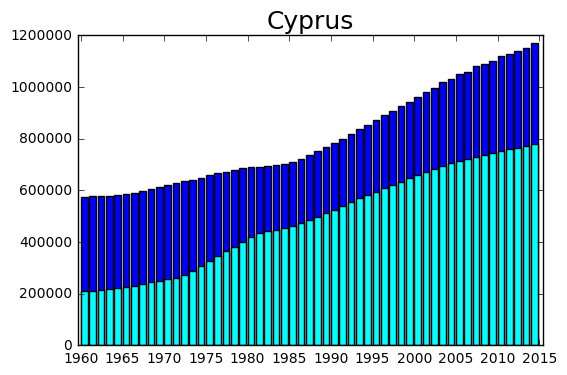

In [14]:
#Creating a test plot of a single country

#Creating the chart's axes
plt.xlim(1959.6, 2015.4)
plt.xticks(range(1960, 2016, 5), fontsize=10)

#creating a loop to iterate through all the columns(Years) 
i=1960
while i <2015:
    plt.bar(i,dfPop.loc[51, str(i+1)], color='blue') #setting the Population value(x value is the year, y value is the ammount of population)
    plt.bar(i,dfUrbanPop.loc[51, str(i+1)], color='cyan') #setting the Urban density value(x value is the year, y value is the ammount of population)
    i+=1
    
plt.title(dfPop.loc[51, str('Country Name')], fontsize=18, ha='center') #setting the appropriate title
    
plt.show() #plotting the result
    

In [15]:
#getting the maximum value from the whole df, to set the axes for all the countries based on that 
maximum=int(dfPop['2015'].values.max())
maximum

1370000000

In [16]:
#sorting the Population df based on the Population values in 2015
dfPop= dfPop.sort(['2015'], ascending=[False])

C:\Users\philip\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [17]:
#getting the sorted index of Population df
dfPop.index

Int64Index([ 41,  87, 200,  88,  26, 145, 141,  15, 157, 124,
            ...
             63, 127, 110, 194,  73, 160,  27, 146, 134, 195],
           dtype='int64', length=210)

In [18]:
#sorting the Urban Density df based on how the Populationdf is sorted
dfUrbanPop=dfUrbanPop.reindex(dfPop.index)

In [19]:
dfPop

Country Name         1960         1961         1962  \
41                            China  667000000.0  660000000.0  666000000.0   
87                            India  450000000.0  459000000.0  468000000.0   
200                   United States  181000000.0  184000000.0  187000000.0   
88                        Indonesia   87800000.0   90100000.0   92600000.0   
26                           Brazil   72500000.0   74700000.0   77000000.0   
145                        Pakistan   44900000.0   46000000.0   47100000.0   
141                         Nigeria   45200000.0   46100000.0   47100000.0   
15                       Bangladesh   48200000.0   49600000.0   51000000.0   
157              Russian Federation  120000000.0  121000000.0  123000000.0   
124                          Mexico   38200000.0   39400000.0   40600000.0   
96                            Japan   92500000.0   94900000.0   95800000.0   
151                     Philippines   26300000.0   27200000.0   28100000.0   
62                         Ethiopia   22200000.0   22700000.0   23200000.0   
205                         Vietnam   34700000.0   35400000.0   36100000.0   
58                 Egypt, Arab Rep.   27100000.0   27800000.0   28600000.0   
71                          Germany   72800000.0   73400000.0   74000000.0   
89               Iran, Islamic Rep.   21900000.0   22500000.0   23100000.0   
192                          Turkey   27600000.0   28200000.0   28900000.0   
44                 Congo, Dem. Rep.   15200000.0   15600000.0   16000000.0   
186                        Thailand   27400000.0   28200000.0   29100000.0   
66                           France   46800000.0   47400000.0   48100000.0   
199                  United Kingdom   52400000.0   52800000.0   53300000.0   
94                            Italy   50200000.0   50500000.0   50900000.0   
171                    South Africa   17400000.0   17900000.0   18500000.0   
132                         Myanmar   21500000.0   22000000.0   22400000.0   
185                        Tanzania   10100000.0   10400000.0   10700000.0   
102                     Korea, Rep.   25000000.0   25800000.0   26500000.0   
42                         Colombia   16500000.0   17000000.0   17500000.0   
173                           Spain   30500000.0   30700000.0   31000000.0   
99                            Kenya    8110000.0    8360000.0    8630000.0   
..                              ...          ...          ...          ...   
50                          Curacao     125000.0     126000.0     128000.0   
100                        Kiribati      41200.0      42300.0      43300.0   
177  St. Vincent and the Grenadines      80900.0      82100.0      83200.0   
76                          Grenada      89900.0      91300.0      92400.0   
189                           Tonga      61600.0      63700.0      66300.0   
206           Virgin Islands (U.S.)      32000.0      34100.0      36300.0   
125           Micronesia, Fed. Sts.      44500.0      46000.0      47400.0   
9                             Aruba      54200.0      55400.0      56200.0   
164                      Seychelles      41700.0      42900.0      44000.0   
6               Antigua and Barbuda      54700.0      55400.0      56300.0   
92                      Isle of Man      48400.0      48400.0      48600.0   
55                         Dominica      60000.0      61000.0      62000.0   
4                           Andorra      13400.0      14400.0      15400.0   
21                          Bermuda      44400.0      45500.0      46600.0   
36                   Cayman Islands       7870.0       8030.0       8140.0   
75                        Greenland      32500.0      33700.0      35000.0   
175             St. Kitts and Nevis      51200.0      51200.0      51000.0   
3                    American Samoa      20000.0      20500.0      21100.0   
142        Northern Mariana Islands      10100.0      10300.0      10500.0   
121                Marshall Islands      1470

In [20]:
#resetting indexes to ascending order
dfUrbanPop=dfUrbanPop.reset_index(drop=True)
dfPop=dfPop.reset_index(drop=True)

In [21]:
dfUrbanPop

Country Name         1960         1961         1962  \
0                             China  108000000.0  110000000.0  115000000.0   
1                             India   80600000.0   82700000.0   85300000.0   
2                     United States  126000000.0  129000000.0  132000000.0   
3                         Indonesia   12800000.0   13400000.0   13900000.0   
4                            Brazil   33400000.0   35200000.0   37000000.0   
5                          Pakistan    9930000.0   10300000.0   10700000.0   
6                           Nigeria    6970000.0    7210000.0    7470000.0   
7                        Bangladesh    2480000.0    2620000.0    2810000.0   
8                Russian Federation   64400000.0   66200000.0   68100000.0   
9                            Mexico   19400000.0   20300000.0   21300000.0   
10                            Japan   58500000.0   61000000.0   62400000.0   
11                      Philippines    7960000.0    8300000.0    8650000.0   
12                         Ethiopia    1420000.0    1510000.0    1600000.0   
13                          Vietnam    5110000.0    5330000.0    5550000.0   
14                 Egypt, Arab Rep.   10300000.0   10600000.0   11000000.0   
15                          Germany   52000000.0   52600000.0   53100000.0   
16               Iran, Islamic Rep.    7390000.0    7730000.0    8090000.0   
17                           Turkey    8680000.0    9050000.0    9420000.0   
18                 Congo, Dem. Rep.    3400000.0    3520000.0    3650000.0   
19                         Thailand    5390000.0    5580000.0    5780000.0   
20                           France   29000000.0   29700000.0   30600000.0   
21                   United Kingdom   41100000.0   41400000.0   41700000.0   
22                            Italy   29800000.0   30200000.0   30700000.0   
23                     South Africa    8110000.0    8400000.0    8660000.0   
24                          Myanmar    4130000.0    4300000.0    4470000.0   
25                         Tanzania     529000.0     560000.0     593000.0   
26                      Korea, Rep.    6930000.0    7350000.0    7810000.0   
27                         Colombia    7420000.0    7870000.0    8330000.0   
28                            Spain   17200000.0   17600000.0   18100000.0   
29                            Kenya     597000.0     633000.0     671000.0   
..                              ...          ...          ...          ...   
180                         Curacao      93300.0      94700.0      96900.0   
181                        Kiribati       6720.0       7150.0       7610.0   
182  St. Vincent and the Grenadines      21000.0      21700.0      22300.0   
183                         Grenada      27300.0      27900.0      28400.0   
184                           Tonga      10800.0      11400.0      12100.0   
185           Virgin Islands (U.S.)      18100.0      19700.0      21500.0   
186           Micronesia, Fed. Sts.       9940.0      10400.0      10800.0   
187                           Aruba      27500.0      28100.0      28500.0   
188                      Seychelles      11500.0      12300.0      13100.0   
189             Antigua and Barbuda      21700.0      21600.0      21600.0   
190                     Isle of Man      26700.0      26800.0      27000.0   
191                        Dominica      22700.0      23100.0      23500.0   
192                         Andorra       7840.0       8770.0       9760.0   
193                         Bermuda      44400.0      45500.0      46600.0   
194                  Cayman Islands       7870.0       8030.0       8140.0   
195                       Greenland      19000.0      20200.0      21500.0   
196             St. Kitts and Nevis      14200.0      14500.0      14700.0   
197                  American Samoa      13300.0      13600.0      14200.0   
198        Northern Mariana Islands       5160.0       5450.0       5720.0   
199                Marshall Islands       522

In [22]:
# The population differences between all the countries of the df were huge, so to normalize the graphs,
#  the values per country group were divided. The groups are created per row of graphs.
#  a loop is created to iterate through all the countries and divide all the values by the appropriate division
#  that division is incorporated into the title of each graph.

columns=14  #number of items per row
for j in range(210):
    if j<columns:
        div=1000
    else: 
        if ((columns<=j) & (j<(columns*2))):
            div=100
        else:
            if(((columns*2))<=j)&(((columns*4))>j):
                div=50
            else:
                if (((columns*4)-1)<=j)&(((columns*6))>j):
                    div=20
                else:
                    if (((columns*6)-1)<=j)&(((columns*8))>j):
                        div=10
                    else:
                        if (((columns*8)-1)<=j)&(((columns*10))>j):
                            div=5
                        else:
                            if (((columns*10)-1)<=j)&(((columns*12))>j):
                                div=2
                            else:
                                if (((columns*12)-1)<=j)&(((columns*15))>j):
                                    div=1
      
    dfPop.loc[j, str('Country Name')]= str(dfPop.loc[j, str('Country Name')]+ '(x ' + str(div) + ')')
    
    i=1960
    while i <2015:
        dfPop.loc[j, str(i)]=dfPop.loc[j, str(i)]/div
        dfUrbanPop.loc[j, str(i)]=dfUrbanPop.loc[j, str(i)]/div
        i+=1
      
      
            

In [23]:
#A function is created, that creates the single graphs per country. 
# it receives the country index number and gives out the graph as a subplot, exactly as the test plot before. 
# however, the axes are now set as standard for all countries, based on the maximum value acquired before

def graph(countrycode):
    
    year=1960
    plt.xlim(1959, 2016)
    plt.ylim(0,  1500000,int(1500000/25))
    plt.xticks(range(1960, 2016, 5), fontsize=11)
    plt.yticks(range(0, 1500000,int(1500000/25)), [format(x)   for x in range(0,  1500000,int(1500000/25))], fontsize=14)

    while year <2015:
        plt.bar(year,dfPop.loc[countrycode, str(year)], color='blue')
        plt.bar(year,dfUrbanPop.loc[countrycode, str(year)], color='cyan')
        year+=1              
   
    plt.title(dfPop.loc[countrycode, str('Country Name')], fontsize=50, ha='center')
    
    plt.plot()

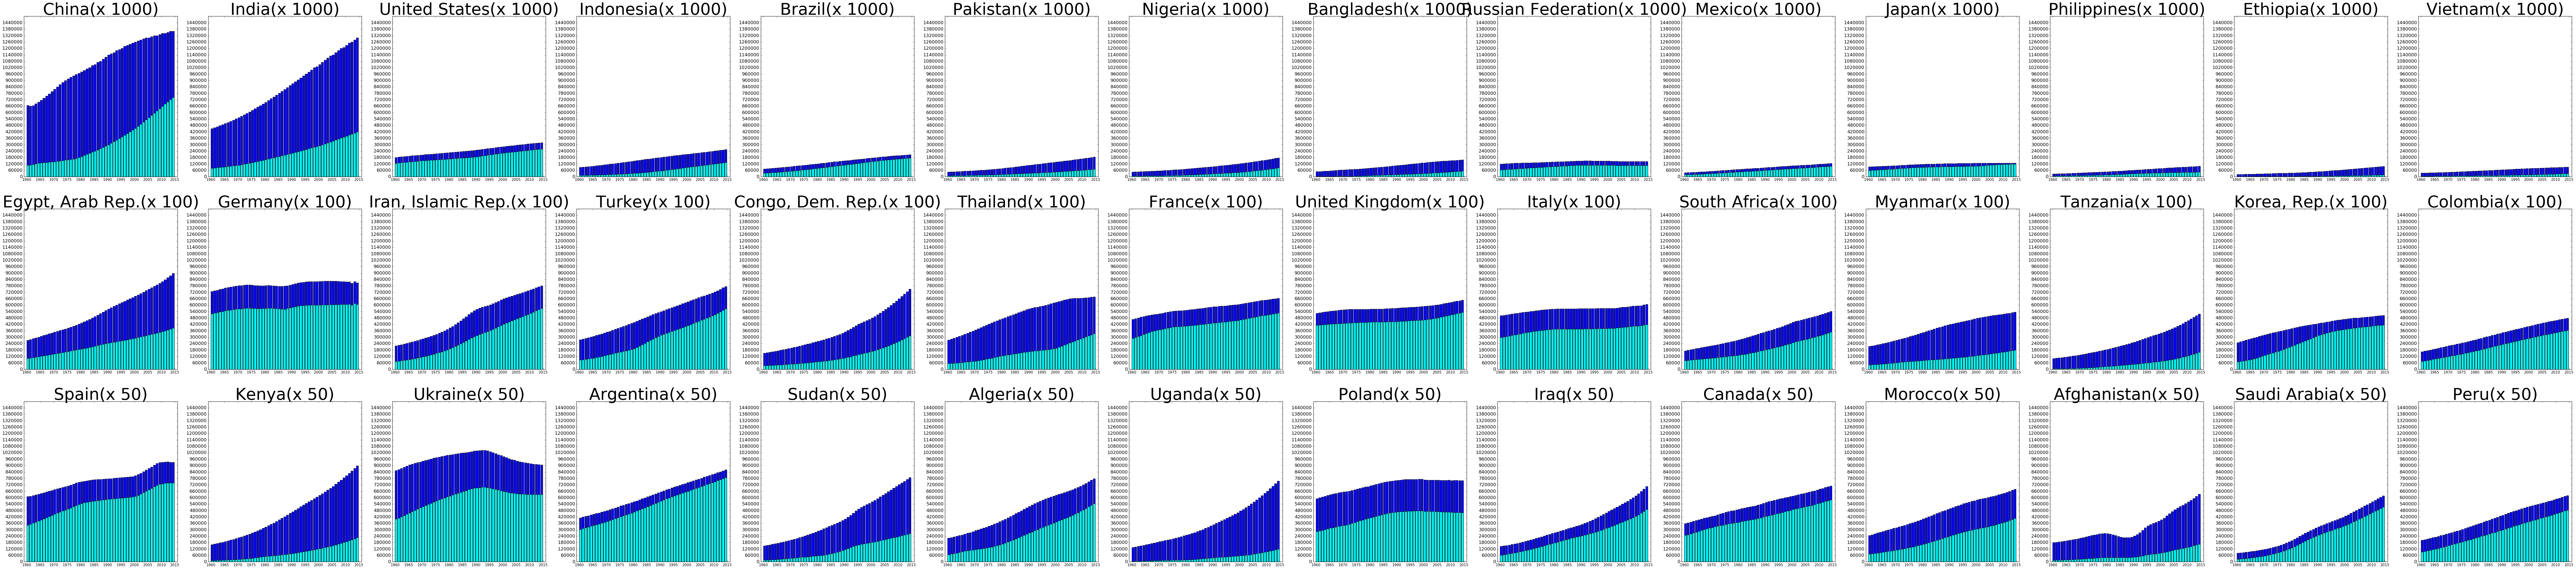

In [24]:
#A test plot (3 rows) with multiple countries is plotted here.

rows=3
fig = plt.figure(figsize=(columns*10,rows*10)) #appropriate space for each subplot is given
         
#a loop that iterates through all the positions of the plot(subplots) and calls the function to create the graph    
for j in range(columns):
    for k in range(rows):
        plt.subplot(rows,columns, k+j*rows+1)
        graph(j*rows+k)
        

   
plt.show()

In [25]:
#The final plot is created here and saved into an external file.

rows=int((len(dfPop)/columns)) #number of rows is calculated, based on the columns
fig = plt.figure(figsize=(columns*10,rows*10))
         
for j in range(columns):
    for k in range(rows):
        plt.subplot(rows,columns, k+j*rows+1)
        graph(j*rows+k)
        

plt.savefig('final subplot 2.png',dpi = (150)) #the plot is saved as a png

# The final chart of the Population/Urban Density Data:

![](https://dl.dropboxusercontent.com/u/77875284/clock/population%20chart.jpg)

### Part2: CO2 emmisions data

In [26]:
#importing a csv file about CO2 emmisions and creating a new df
dfnew = pd.read_csv('WDI_Data_Countries.csv', usecols=['Country Name','Country Code','Indicator Name','1975','1980','1985', '1990','1995','2000','2005','2010','2015'],header=0, encoding = "ISO-8859-1")

In [27]:
dfnew

Country Name Country Code  \
0       Afghanistan          AFG   
1       Afghanistan          AFG   
2       Afghanistan          AFG   
3       Afghanistan          AFG   
4       Afghanistan          AFG   
5       Afghanistan          AFG   
6       Afghanistan          AFG   
7       Afghanistan          AFG   
8       Afghanistan          AFG   
9       Afghanistan          AFG   
10      Afghanistan          AFG   
11      Afghanistan          AFG   
12      Afghanistan          AFG   
13      Afghanistan          AFG   
14      Afghanistan          AFG   
15      Afghanistan          AFG   
16      Afghanistan          AFG   
17      Afghanistan          AFG   
18      Afghanistan          AFG   
19      Afghanistan          AFG   
20      Afghanistan          AFG   
21      Afghanistan          AFG   
22      Afghanistan          AFG   
23      Afghanistan          AFG   
24      Afghanistan          AFG   
25      Afghanistan          AFG   
26      Afghanistan          AFG   
27      Afghanistan          AFG   
28      Afghanistan          AFG   
29      Afghanistan          AFG   
...             ...          ...   
313752     Zimbabwe          ZWE   
313753     Zimbabwe          ZWE   
313754     Zimbabwe          ZWE   
313755     Zimbabwe          ZWE   
313756     Zimbabwe          ZWE   
313757     Zimbabwe          ZWE   
313758     Zimbabwe          ZWE   
313759     Zimbabwe          ZWE   
313760     Zimbabwe          ZWE   
313761     Zimbabwe          ZWE   
313762     Zimbabwe          ZWE   
313763     Zimbabwe          ZWE   
313764     Zimbabwe          ZWE   
313765     Zimbabwe          ZWE   
313766     Zimbabwe          ZWE   
313767     Zimbabwe          ZWE   
313768     Zimbabwe          ZWE   
313769     Zimbabwe          ZWE   
313770     Zimbabwe          ZWE   
313771     Zimbabwe          ZWE   
313772     Zimbabwe          ZWE   
313773     Zimbabwe          ZWE   
313774     Zimbabwe          ZWE   
313775     Zimbabwe          ZWE   
313776     Zimbabwe          ZWE   
313777     Zimbabwe          ZWE   
313778     Zimbabwe          ZWE   
313779     Zimbabwe          ZWE   
313780     Zimbabwe          ZWE   
313781     Zimbabwe          ZWE   

                                           Indicator Name          1975  \
0       2005 PPP conversion factor, GDP (LCU per inter...           NaN   
1       2005 PPP conversion factor, private consumptio...           NaN   
2                 Access to electricity (% of population)           NaN   
3       Access to electricity, rural (% of rural popul...           NaN   
4       Access to electricity, urban (% of urban popul...           NaN   
5              Access to non-solid fuel (% of population)           NaN   
6       Access to non-solid fuel, rural (% of rural po...           NaN   
7       Access to non-solid fuel, urban (% of urban po...           NaN   
8       Account at a financial institution (% age 15+)...           NaN   
9       Account at a financial institution, female (% ...           NaN   
10      Account at a financial institution, income, po...           NaN   
11      Account at a financial institution, income, ri...           NaN   
12      Account at a financial institution, male (% ag...           NaN   
13      Adequacy of social insurance programs (% of to...           NaN   
14      Adequacy of social protection and labor progra...           NaN   
15      Adequacy of social safety net programs (% of t...           NaN   
16      Adequacy of unemployment benefits and ALMP (% ...           NaN   
17      Adjusted net enrollment rate, primary, female ...           NaN   
18      Adjusted net enrollment rate, primary, male (%...           NaN   
19      Adjusted net enrolment rate, primary, both sex...           NaN   
20         Adjusted net national income (annual % growth)           NaN   
21       Adjusted net national income (constant 2010 US$)           NaN   
22             Adjusted net national income (curr

In [28]:
#organising the Dataframe

dfCO2new = dfnew[dfnew['Indicator Name'].str.contains('CO2')]   #create a new DF, which contains rows that refer to CO2 data 

#delete unnecessary columns
del dfCO2new['Indicator Name']
del dfCO2new['Country Name']

dfCO2new.dropna(axis=0, how='all', inplace=True)         #delete all rows that contain only null values
dfCO2new.dropna(axis='columns', how='all',inplace=True)  #delete all columns that contain only null values
dfCO2new.dropna(axis=0, how='any', inplace=True)         #delete all rows that contain any null value

#importing csv dataframe with only certain columns
df4 = pd.read_csv('WDI_Data_Countries.csv',usecols=['Country Name','Indicator Name'], header=0, encoding = "ISO-8859-1")   #importing csv dataframe

#merging the two dataframes to reacquire the deleted columns
dfCO2new = pd.merge(df4,dfCO2new, right_index=True, left_index=True)
dfCO2new

C:\Users\philip\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\philip\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\philip\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Country Name                                     Indicator Name  \
208     Afghanistan                                 CO2 emissions (kt)   
209     Afghanistan             CO2 emissions (metric tons per capita)   
211     Afghanistan  CO2 emissions from gaseous fuel consumption (%...   
212     Afghanistan   CO2 emissions from gaseous fuel consumption (kt)   
213     Afghanistan  CO2 emissions from liquid fuel consumption (% ...   
214     Afghanistan    CO2 emissions from liquid fuel consumption (kt)   
218     Afghanistan  CO2 emissions from solid fuel consumption (% o...   
219     Afghanistan     CO2 emissions from solid fuel consumption (kt)   
815     Afghanistan           Methane emissions (kt of CO2 equivalent)   
950     Afghanistan  Nitrous oxide emissions (thousand metric tons ...   
971     Afghanistan  Other greenhouse gas emissions, HFC, PFC and S...   
1358    Afghanistan  Total greenhouse gas emissions (kt of CO2 equi...   
1654        Albania                                 CO2 emissions (kt)   
1655        Albania             CO2 emissions (metric tons per capita)   
1656        Albania  CO2 emissions from electricity and heat produc...   
1657        Albania  CO2 emissions from gaseous fuel consumption (%...   
1658        Albania   CO2 emissions from gaseous fuel consumption (kt)   
1659        Albania  CO2 emissions from liquid fuel consumption (% ...   
1660        Albania    CO2 emissions from liquid fuel consumption (kt)   
1661        Albania  CO2 emissions from manufacturing industries an...   
1662        Albania  CO2 emissions from other sectors, excluding re...   
1663        Albania  CO2 emissions from residential buildings and c...   
1664        Albania  CO2 emissions from solid fuel consumption (% o...   
1665        Albania     CO2 emissions from solid fuel consumption (kt)   
1666        Albania  CO2 emissions from transport (% of total fuel ...   
1667        Albania  CO2 intensity (kg per kg of oil equivalent ene...   
2261        Albania           Methane emissions (kt of CO2 equivalent)   
2396        Albania  Nitrous oxide emissions (thousand metric tons ...   
2417        Albania  Other greenhouse gas emissions, HFC, PFC and S...   
2804        Albania  Total greenhouse gas emissions (kt of CO2 equi...   
...             ...                                                ...   
311105       Zambia  CO2 emissions from manufacturing industries an...   
311106       Zambia  CO2 emissions from other sectors, excluding re...   
311107       Zambia  CO2 emissions from residential buildings and c...   
311108       Zambia  CO2 emissions from solid fuel consumption (% o...   
311109       Zambia     CO2 emissions from solid fuel consumption (kt)   
311110       Zambia  CO2 emissions from transport (% of total fuel ...   
311111       Zambia  CO2 intensity (kg per kg of oil equivalent ene...   
311705       Zambia           Methane emissions (kt of CO2 equivalent)   
311840       Zambia  Nitrous oxide emissions (thousand metric tons ...   
311861       Zambia  Other greenhouse gas emissions, HFC, PFC and S...   
312248       Zambia  Total greenhouse gas emissions (kt of CO2 equi...   
312541     Zimbabwe             CO2 emissions (kg per 2010 US$ of GDP)   
312544     Zimbabwe                                 CO2 emissions (kt)   
312545     Zimbabwe             CO2 emissions (metric tons per capita)   
312546     Zimbabwe  CO2 emissions from electricity and heat produc...   
312547     Zimbabwe  CO2 emissions from gaseous fuel consumption (%...   
312548     Zimbabwe   CO2 emissions from gaseous fuel consumption (kt)   
312549     Zimbabwe  CO2 emissions from liquid fuel consumption (% ...   
312550     Zimbabwe    CO2 emissions from liquid fuel consumption (kt)   
312551     Zimbabwe  CO2 emissions from manufacturing industries an...   
312552     Zimbabwe  CO2 emissions from other sectors, excluding re...   
312553     Zimbabwe  CO2 emissions from residential buildings and c...   
312554     

In [29]:
#create a new DF, which contains rows that include '% of total fuel combustion', which will be the data for the categorization of CO2 emmissions

dfCO2percentnew = dfCO2new[dfCO2new['Indicator Name'].str.contains('% of total fuel combustion')] 
dfCO2percentnew

Country Name                                     Indicator Name  \
1656          Albania  CO2 emissions from electricity and heat produc...   
1661          Albania  CO2 emissions from manufacturing industries an...   
1662          Albania  CO2 emissions from other sectors, excluding re...   
1663          Albania  CO2 emissions from residential buildings and c...   
1666          Albania  CO2 emissions from transport (% of total fuel ...   
3102          Algeria  CO2 emissions from electricity and heat produc...   
3107          Algeria  CO2 emissions from manufacturing industries an...   
3108          Algeria  CO2 emissions from other sectors, excluding re...   
3109          Algeria  CO2 emissions from residential buildings and c...   
3112          Algeria  CO2 emissions from transport (% of total fuel ...   
7440           Angola  CO2 emissions from electricity and heat produc...   
7445           Angola  CO2 emissions from manufacturing industries an...   
7446           Angola  CO2 emissions from other sectors, excluding re...   
7447           Angola  CO2 emissions from residential buildings and c...   
7450           Angola  CO2 emissions from transport (% of total fuel ...   
10332       Argentina  CO2 emissions from electricity and heat produc...   
10337       Argentina  CO2 emissions from manufacturing industries an...   
10338       Argentina  CO2 emissions from other sectors, excluding re...   
10339       Argentina  CO2 emissions from residential buildings and c...   
10342       Argentina  CO2 emissions from transport (% of total fuel ...   
14670       Australia  CO2 emissions from electricity and heat produc...   
14675       Australia  CO2 emissions from manufacturing industries an...   
14676       Australia  CO2 emissions from other sectors, excluding re...   
14677       Australia  CO2 emissions from residential buildings and c...   
14680       Australia  CO2 emissions from transport (% of total fuel ...   
16116         Austria  CO2 emissions from electricity and heat produc...   
16121         Austria  CO2 emissions from manufacturing industries an...   
16122         Austria  CO2 emissions from other sectors, excluding re...   
16123         Austria  CO2 emissions from residential buildings and c...   
16126         Austria  CO2 emissions from transport (% of total fuel ...   
...               ...                                                ...   
299532        Uruguay  CO2 emissions from electricity and heat produc...   
299537        Uruguay  CO2 emissions from manufacturing industries an...   
299538        Uruguay  CO2 emissions from other sectors, excluding re...   
299539        Uruguay  CO2 emissions from residential buildings and c...   
299542        Uruguay  CO2 emissions from transport (% of total fuel ...   
303870  Venezuela, RB  CO2 emissions from electricity and heat produc...   
303875  Venezuela, RB  CO2 emissions from manufacturing industries an...   
303876  Venezuela, RB  CO2 emissions from other sectors, excluding re...   
303877  Venezuela, RB  CO2 emissions from residential buildings and c...   
303880  Venezuela, RB  CO2 emissions from transport (% of total fuel ...   
305316        Vietnam  CO2 emissions from electricity and heat produc...   
305321        Vietnam  CO2 emissions from manufacturing industries an...   
305322        Vietnam  CO2 emissions from other sectors, excluding re...   
305323        Vietnam  CO2 emissions from residential buildings and c...   
305326        Vietnam  CO2 emissions from transport (% of total fuel ...   
309654    Yemen, Rep.  CO2 emissions from electricity and heat produc...   
309659    Yemen, Rep.  CO2 emissions from manufacturing industries an...   
309660    Yemen, Rep.  CO2 emissions from other sectors, excluding re...   
309661    Yemen, Rep.  CO2 emissions from residential buildings and c...   
309664    Yemen, Rep.  CO2 emissions from transport (% of total fuel ...   
311100         Zambia  CO2 emissions from electricity and

In [30]:
#create a new DF, which contains rows that include "CO2 emissions (metric tons per capita)", which will be the data for the exact values of CO2 emmissions

dfCO2Totalnew=  dfCO2new[dfCO2new['Indicator Name'] ==  "CO2 emissions (metric tons per capita)"] 
dfCO2Totalnew

Country Name  \
209                        Afghanistan   
1655                           Albania   
3101                           Algeria   
7439                            Angola   
8885               Antigua and Barbuda   
10331                        Argentina   
14669                        Australia   
16115                          Austria   
19007                     Bahamas, The   
20453                          Bahrain   
21899                       Bangladesh   
23345                         Barbados   
26237                          Belgium   
27683                           Belize   
29129                            Benin   
30575                          Bermuda   
32021                           Bhutan   
33467                          Bolivia   
36359                         Botswana   
37805                           Brazil   
39251           British Virgin Islands   
40697                Brunei Darussalam   
42143                         Bulgaria   
43589                     Burkina Faso   
45035                          Burundi   
46481                       Cabo Verde   
47927                         Cambodia   
49373                         Cameroon   
50819                           Canada   
52265                   Cayman Islands   
...                                ...   
254705                    South Africa   
257597                           Spain   
259043                       Sri Lanka   
260489             St. Kitts and Nevis   
261935                       St. Lucia   
264827  St. Vincent and the Grenadines   
266273                           Sudan   
267719                        Suriname   
269165                       Swaziland   
270611                          Sweden   
272057                     Switzerland   
273503            Syrian Arab Republic   
276395                        Tanzania   
277841                        Thailand   
280733                            Togo   
282179                           Tonga   
283625             Trinidad and Tobago   
285071                         Tunisia   
286517                          Turkey   
292301                          Uganda   
295193            United Arab Emirates   
296639                  United Kingdom   
298085                   United States   
299531                         Uruguay   
302423                         Vanuatu   
303869                   Venezuela, RB   
305315                         Vietnam   
309653                     Yemen, Rep.   
311099                          Zambia   
312545                        Zimbabwe   

                                Indicator Name Country Code      1975  \
209     CO2 emissions (metric tons per capita)          AFG   0.16900   
1655    CO2 emissions (metric tons per capita)          ALB   1.91000   
3101    CO2 emissions (metric tons per capita)          DZA   1.92000   
7439    CO2 emissions (metric tons per capita)          AGO   0.62100   
8885    CO2 emissions (metric tons per capita)          ATG  10.20000   
10331   CO2 emissions (metric tons per capita)          ARG   3.64000   
14669   CO2 emissions (metric tons per capita)          AUS  12.70000   
16115   CO2 emissions (metric tons per capita)          AUT   7.18000   
19007   CO2 emissions (metric tons per capita)          BHS  43.70000   
20453   CO2 emissions (metric tons per capita)          BHR  21.60000   
21899   CO2 emissions (metric tons per capita)          BGD   0.06840   
23345   CO2 emissions (metric tons per capita)          BRB   2.31000   
26237   CO2 emissions (metric tons per capita)          BEL  12.50000   
27683   CO2 emissions (metric tons per capita)          BLZ   1.32000   
29129   CO2 emissions (metric tons per capita)          BEN   0.13600   
30575   CO2 emissions (metric tons per capita)          BMU   8.65000   
32021   CO2 emissions (metric tons per capita)          BTN   0.01050   
33467   CO2 emissions (metric tons per capita)          BOL   0.81000   
36359   CO2 emissions (metric tons

In [31]:
#exploring the df to better understand the data at hand

dfCO2percentnew['Indicator Name'].value_counts()

CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)    112
CO2 emissions from manufacturing industries and construction (% of total fuel combustion)                                            112
CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)                             112
CO2 emissions from transport (% of total fuel combustion)                                                                            112
CO2 emissions from electricity and heat production, total (% of total fuel combustion)                                               112
Name: Indicator Name, dtype: int64

In [32]:
#reseting df index

dfCO2percentnew=dfCO2percentnew.reset_index(drop=True)
dfCO2percentnew

Country Name                                     Indicator Name  \
0          Albania  CO2 emissions from electricity and heat produc...   
1          Albania  CO2 emissions from manufacturing industries an...   
2          Albania  CO2 emissions from other sectors, excluding re...   
3          Albania  CO2 emissions from residential buildings and c...   
4          Albania  CO2 emissions from transport (% of total fuel ...   
5          Algeria  CO2 emissions from electricity and heat produc...   
6          Algeria  CO2 emissions from manufacturing industries an...   
7          Algeria  CO2 emissions from other sectors, excluding re...   
8          Algeria  CO2 emissions from residential buildings and c...   
9          Algeria  CO2 emissions from transport (% of total fuel ...   
10          Angola  CO2 emissions from electricity and heat produc...   
11          Angola  CO2 emissions from manufacturing industries an...   
12          Angola  CO2 emissions from other sectors, excluding re...   
13          Angola  CO2 emissions from residential buildings and c...   
14          Angola  CO2 emissions from transport (% of total fuel ...   
15       Argentina  CO2 emissions from electricity and heat produc...   
16       Argentina  CO2 emissions from manufacturing industries an...   
17       Argentina  CO2 emissions from other sectors, excluding re...   
18       Argentina  CO2 emissions from residential buildings and c...   
19       Argentina  CO2 emissions from transport (% of total fuel ...   
20       Australia  CO2 emissions from electricity and heat produc...   
21       Australia  CO2 emissions from manufacturing industries an...   
22       Australia  CO2 emissions from other sectors, excluding re...   
23       Australia  CO2 emissions from residential buildings and c...   
24       Australia  CO2 emissions from transport (% of total fuel ...   
25         Austria  CO2 emissions from electricity and heat produc...   
26         Austria  CO2 emissions from manufacturing industries an...   
27         Austria  CO2 emissions from other sectors, excluding re...   
28         Austria  CO2 emissions from residential buildings and c...   
29         Austria  CO2 emissions from transport (% of total fuel ...   
..             ...                                                ...   
530        Uruguay  CO2 emissions from electricity and heat produc...   
531        Uruguay  CO2 emissions from manufacturing industries an...   
532        Uruguay  CO2 emissions from other sectors, excluding re...   
533        Uruguay  CO2 emissions from residential buildings and c...   
534        Uruguay  CO2 emissions from transport (% of total fuel ...   
535  Venezuela, RB  CO2 emissions from electricity and heat produc...   
536  Venezuela, RB  CO2 emissions from manufacturing industries an...   
537  Venezuela, RB  CO2 emissions from other sectors, excluding re...   
538  Venezuela, RB  CO2 emissions from residential buildings and c...   
539  Venezuela, RB  CO2 emissions from transport (% of total fuel ...   
540        Vietnam  CO2 emissions from electricity and heat produc...   
541        Vietnam  CO2 emissions from manufacturing industries an...   
542        Vietnam  CO2 emissions from other sectors, excluding re...   
543        Vietnam  CO2 emissions from residential buildings and c...   
544        Vietnam  CO2 emissions from transport (% of total fuel ...   
545    Yemen, Rep.  CO2 emissions from electricity and heat produc...   
546    Yemen, Rep.  CO2 emissions from manufacturing industries an...   
547    Yemen, Rep.  CO2 emissions from other sectors, excluding re...   
548    Yemen, Rep.  CO2 emissions from residential buildings and c...   
549    Yemen, Rep.  CO2 emissions from transport (% of total fuel ...   
550         Zambia  CO2 emissions from electricity and heat produc...   
551         Zambia  CO2 emissions from manufacturing industries an...   
552         Zambia  CO2 emissions from other sectors, excluding 

In [33]:
#creating a duplicate column of the countries names, for both dataframes(CO2 values & CO2 percentage)

name = dfCO2Totalnew['Country Name']
namepercent = dfCO2percentnew['Country Name']
dfCO2Totalnew.insert(0, 'Name', name)
dfCO2percentnew.insert(0, 'Name', namepercent)
dfCO2Totalnew

Name                    Country Name  \
209                        Afghanistan                     Afghanistan   
1655                           Albania                         Albania   
3101                           Algeria                         Algeria   
7439                            Angola                          Angola   
8885               Antigua and Barbuda             Antigua and Barbuda   
10331                        Argentina                       Argentina   
14669                        Australia                       Australia   
16115                          Austria                         Austria   
19007                     Bahamas, The                    Bahamas, The   
20453                          Bahrain                         Bahrain   
21899                       Bangladesh                      Bangladesh   
23345                         Barbados                        Barbados   
26237                          Belgium                         Belgium   
27683                           Belize                          Belize   
29129                            Benin                           Benin   
30575                          Bermuda                         Bermuda   
32021                           Bhutan                          Bhutan   
33467                          Bolivia                         Bolivia   
36359                         Botswana                        Botswana   
37805                           Brazil                          Brazil   
39251           British Virgin Islands          British Virgin Islands   
40697                Brunei Darussalam               Brunei Darussalam   
42143                         Bulgaria                        Bulgaria   
43589                     Burkina Faso                    Burkina Faso   
45035                          Burundi                         Burundi   
46481                       Cabo Verde                      Cabo Verde   
47927                         Cambodia                        Cambodia   
49373                         Cameroon                        Cameroon   
50819                           Canada                          Canada   
52265                   Cayman Islands                  Cayman Islands   
...                                ...                             ...   
254705                    South Africa                    South Africa   
257597                           Spain                           Spain   
259043                       Sri Lanka                       Sri Lanka   
260489             St. Kitts and Nevis             St. Kitts and Nevis   
261935                       St. Lucia                       St. Lucia   
264827  St. Vincent and the Grenadines  St. Vincent and the Grenadines   
266273                           Sudan                           Sudan   
267719                        Suriname                        Suriname   
269165                       Swaziland                       Swaziland   
270611                          Sweden                          Sweden   
272057                     Switzerland                     Switzerland   
273503            Syrian Arab Republic            Syrian Arab Republic   
276395                        Tanzania                        Tanzania   
277841                        Thailand                        Thailand   
280733                            Togo                            Togo   
282179                           Tonga                           Tonga   
283625             Trinidad and Tobago             Trinidad and Tobago   
285071                         Tunisia                         Tunisia   
286517                          Turkey                          Turkey   
292301                          Uganda                          Uganda   
295193            United Arab Emirates            United Arab Emirates   
296639                  United Kingdom                  United Kingdom   
298085                   United States

In [34]:
#setting the duplicated columns as the indexes
dfCO2Totalnew= dfCO2Totalnew.set_index(['Name'])
dfCO2percentnew= dfCO2percentnew.set_index(['Name'])

In [35]:
#merging the dfs to acquire the same ammount of data
dftemp= pd.merge(dfCO2Totalnew,dfCO2percentnew, right_index=True, left_index=True)
dftemp

Country Name_x                        Indicator Name_x  \
Name                                                                   
Albania              Albania  CO2 emissions (metric tons per capita)   
Albania              Albania  CO2 emissions (metric tons per capita)   
Albania              Albania  CO2 emissions (metric tons per capita)   
Albania              Albania  CO2 emissions (metric tons per capita)   
Albania              Albania  CO2 emissions (metric tons per capita)   
Algeria              Algeria  CO2 emissions (metric tons per capita)   
Algeria              Algeria  CO2 emissions (metric tons per capita)   
Algeria              Algeria  CO2 emissions (metric tons per capita)   
Algeria              Algeria  CO2 emissions (metric tons per capita)   
Algeria              Algeria  CO2 emissions (metric tons per capita)   
Angola                Angola  CO2 emissions (metric tons per capita)   
Angola                Angola  CO2 emissions (metric tons per capita)   
Angola                Angola  CO2 emissions (metric tons per capita)   
Angola                Angola  CO2 emissions (metric tons per capita)   
Angola                Angola  CO2 emissions (metric tons per capita)   
Argentina          Argentina  CO2 emissions (metric tons per capita)   
Argentina          Argentina  CO2 emissions (metric tons per capita)   
Argentina          Argentina  CO2 emissions (metric tons per capita)   
Argentina          Argentina  CO2 emissions (metric tons per capita)   
Argentina          Argentina  CO2 emissions (metric tons per capita)   
Australia          Australia  CO2 emissions (metric tons per capita)   
Australia          Australia  CO2 emissions (metric tons per capita)   
Australia          Australia  CO2 emissions (metric tons per capita)   
Australia          Australia  CO2 emissions (metric tons per capita)   
Australia          Australia  CO2 emissions (metric tons per capita)   
Austria              Austria  CO2 emissions (metric tons per capita)   
Austria              Austria  CO2 emissions (metric tons per capita)   
Austria              Austria  CO2 emissions (metric tons per capita)   
Austria              Austria  CO2 emissions (metric tons per capita)   
Austria              Austria  CO2 emissions (metric tons per capita)   
...                      ...                                     ...   
Uruguay              Uruguay  CO2 emissions (metric tons per capita)   
Uruguay              Uruguay  CO2 emissions (metric tons per capita)   
Uruguay              Uruguay  CO2 emissions (metric tons per capita)   
Uruguay              Uruguay  CO2 emissions (metric tons per capita)   
Uruguay              Uruguay  CO2 emissions (metric tons per capita)   
Venezuela, RB  Venezuela, RB  CO2 emissions (metric tons per capita)   
Venezuela, RB  Venezuela, RB  CO2 emissions (metric tons per capita)   
Venezuela, RB  Venezuela, RB  CO2 emissions (metric tons per capita)   
Venezuela, RB  Venezuela, RB  CO2 emissions (metric tons per capita)   
Venezuela, RB  Venezuela, RB  CO2 emissions (metric tons per capita)   
Vietnam              Vietnam  CO2 emissions (metric tons per capita)   
Vietnam              Vietnam  CO2 emissions (metric tons per capita)   
Vietnam              Vietnam  CO2 emissions (metric tons per capita)   
Vietnam              Vietnam  CO2 emissions (metric tons per capita)   
Vietnam              Vietnam  CO2 emissions (metric tons per capita)   
Yemen, Rep.      Yemen, Rep.  CO2 emissions (metric tons per capita)   
Yemen, Rep.      Yemen, Rep.  CO2 emissions (metric tons per capita)   
Yemen, Rep.      Yemen, Rep.  CO2 emissions (metric tons per capita)   
Yemen, Rep.      Yemen, Rep.  CO2 emissions (metric tons per capita)   
Yemen, Rep.      Yemen, Rep.  CO2 emissions (metric tons per capita)   
Zambia                Zambia  CO2 emissions (metric tons per capita)   
Zambia                Zambia  CO2 emissions (metric tons per capita)   
Zambia                Zambia  CO2 emissions (metric to

In [36]:
#removing duplicate values(countries are repeated in groups of 5)
dftemp = dftemp.iloc[::5, :]

In [37]:
dftemp

Country Name_x  \
Name                                         
Albania                            Albania   
Algeria                            Algeria   
Angola                              Angola   
Argentina                        Argentina   
Australia                        Australia   
Austria                            Austria   
Bahrain                            Bahrain   
Bangladesh                      Bangladesh   
Belgium                            Belgium   
Benin                                Benin   
Bolivia                            Bolivia   
Brazil                              Brazil   
Brunei Darussalam        Brunei Darussalam   
Bulgaria                          Bulgaria   
Cameroon                          Cameroon   
Canada                              Canada   
Chile                                Chile   
China                                China   
Colombia                          Colombia   
Congo, Dem. Rep.          Congo, Dem. Rep.   
Congo, Rep.                    Congo, Rep.   
Costa Rica                      Costa Rica   
Cote d'Ivoire                Cote d'Ivoire   
Cuba                                  Cuba   
Cyprus                              Cyprus   
Denmark                            Denmark   
Dominican Republic      Dominican Republic   
Ecuador                            Ecuador   
Egypt, Arab Rep.          Egypt, Arab Rep.   
El Salvador                    El Salvador   
...                                    ...   
Philippines                    Philippines   
Poland                              Poland   
Portugal                          Portugal   
Qatar                                Qatar   
Romania                            Romania   
Saudi Arabia                  Saudi Arabia   
Senegal                            Senegal   
Singapore                        Singapore   
South Africa                  South Africa   
Spain                                Spain   
Sri Lanka                        Sri Lanka   
Sudan                                Sudan   
Sweden                              Sweden   
Switzerland                    Switzerland   
Syrian Arab Republic  Syrian Arab Republic   
Tanzania                          Tanzania   
Thailand                          Thailand   
Togo                                  Togo   
Trinidad and Tobago    Trinidad and Tobago   
Tunisia                            Tunisia   
Turkey                              Turkey   
United Arab Emirates  United Arab Emirates   
United Kingdom              United Kingdom   
United States                United States   
Uruguay                            Uruguay   
Venezuela, RB                Venezuela, RB   
Vietnam                            Vietnam   
Yemen, Rep.                    Yemen, Rep.   
Zambia                              Zambia   
Zimbabwe                          Zimbabwe   

                                            Indicator Name_x Country Code_x  \
Name                                                                          
Albania               CO2 emissions (metric tons per capita)            ALB   
Algeria               CO2 emissions (metric tons per capita)            DZA   
Angola                CO2 emissions (metric tons per capita)            AGO   
Argentina             CO2 emissions (metric tons per capita)            ARG   
Australia             CO2 emissions (metric tons per capita)            AUS   
Austria               CO2 emissions (metric tons per capita)            AUT   
Bahrain               CO2 emissions (metric tons per capita)            BHR   
Bangladesh            CO2 emissions (metric tons per capita)            BGD   
Belgium               CO2 emissions (metric tons per capita)            BEL   
Benin                 CO2 emissions (metric tons per capita)            BEN   
Bolivia               CO2 emissions (metric tons per capita)            BOL   
Brazil                CO2 emissions (metric tons per capita)            BRA   
Brunei Darussalam     C

In [38]:
#removing unnecessary columns
dftemp=dftemp.drop(dftemp.ix[:,'Country Name_x':'2010_y'].head(0).columns, axis=1)

In [39]:
#merging the temporary df index with the original dfs to keep the common countries that have values in both dfs

dfCO2Total= pd.merge(dfCO2Totalnew,dftemp, right_index=True, left_index=True)
dfCO2Percentage= pd.merge(dftemp,dfCO2percentnew, right_index=True, left_index=True)

In [40]:
#resetting indexes to ascending order

dfCO2Total=dfCO2Total.reset_index(drop=True)
dfCO2Percentage= dfCO2Percentage.reset_index(drop=True)

In [41]:
dfCO2Percentage

Country Name                                     Indicator Name  \
0          Albania  CO2 emissions from electricity and heat produc...   
1          Albania  CO2 emissions from manufacturing industries an...   
2          Albania  CO2 emissions from other sectors, excluding re...   
3          Albania  CO2 emissions from residential buildings and c...   
4          Albania  CO2 emissions from transport (% of total fuel ...   
5          Algeria  CO2 emissions from electricity and heat produc...   
6          Algeria  CO2 emissions from manufacturing industries an...   
7          Algeria  CO2 emissions from other sectors, excluding re...   
8          Algeria  CO2 emissions from residential buildings and c...   
9          Algeria  CO2 emissions from transport (% of total fuel ...   
10          Angola  CO2 emissions from electricity and heat produc...   
11          Angola  CO2 emissions from manufacturing industries an...   
12          Angola  CO2 emissions from other sectors, excluding re...   
13          Angola  CO2 emissions from residential buildings and c...   
14          Angola  CO2 emissions from transport (% of total fuel ...   
15       Argentina  CO2 emissions from electricity and heat produc...   
16       Argentina  CO2 emissions from manufacturing industries an...   
17       Argentina  CO2 emissions from other sectors, excluding re...   
18       Argentina  CO2 emissions from residential buildings and c...   
19       Argentina  CO2 emissions from transport (% of total fuel ...   
20       Australia  CO2 emissions from electricity and heat produc...   
21       Australia  CO2 emissions from manufacturing industries an...   
22       Australia  CO2 emissions from other sectors, excluding re...   
23       Australia  CO2 emissions from residential buildings and c...   
24       Australia  CO2 emissions from transport (% of total fuel ...   
25         Austria  CO2 emissions from electricity and heat produc...   
26         Austria  CO2 emissions from manufacturing industries an...   
27         Austria  CO2 emissions from other sectors, excluding re...   
28         Austria  CO2 emissions from residential buildings and c...   
29         Austria  CO2 emissions from transport (% of total fuel ...   
..             ...                                                ...   
505        Uruguay  CO2 emissions from electricity and heat produc...   
506        Uruguay  CO2 emissions from manufacturing industries an...   
507        Uruguay  CO2 emissions from other sectors, excluding re...   
508        Uruguay  CO2 emissions from residential buildings and c...   
509        Uruguay  CO2 emissions from transport (% of total fuel ...   
510  Venezuela, RB  CO2 emissions from electricity and heat produc...   
511  Venezuela, RB  CO2 emissions from manufacturing industries an...   
512  Venezuela, RB  CO2 emissions from other sectors, excluding re...   
513  Venezuela, RB  CO2 emissions from residential buildings and c...   
514  Venezuela, RB  CO2 emissions from transport (% of total fuel ...   
515        Vietnam  CO2 emissions from electricity and heat produc...   
516        Vietnam  CO2 emissions from manufacturing industries an...   
517        Vietnam  CO2 emissions from other sectors, excluding re...   
518        Vietnam  CO2 emissions from residential buildings and c...   
519        Vietnam  CO2 emissions from transport (% of total fuel ...   
520    Yemen, Rep.  CO2 emissions from electricity and heat produc...   
521    Yemen, Rep.  CO2 emissions from manufacturing industries an...   
522    Yemen, Rep.  CO2 emissions from other sectors, excluding re...   
523    Yemen, Rep.  CO2 emissions from residential buildings and c...   
524    Yemen, Rep.  CO2 emissions from transport (% of total fuel ...   
525         Zambia  CO2 emissions from electricity and heat produc...   
526         Zambia  CO2 emissions from manufacturing industries an...   
527         Zambia  CO2 emissions from other sectors, excluding 

In [42]:
dfCO2Total

Country Name                          Indicator Name  \
0                 Albania  CO2 emissions (metric tons per capita)   
1                 Algeria  CO2 emissions (metric tons per capita)   
2                  Angola  CO2 emissions (metric tons per capita)   
3               Argentina  CO2 emissions (metric tons per capita)   
4               Australia  CO2 emissions (metric tons per capita)   
5                 Austria  CO2 emissions (metric tons per capita)   
6                 Bahrain  CO2 emissions (metric tons per capita)   
7              Bangladesh  CO2 emissions (metric tons per capita)   
8                 Belgium  CO2 emissions (metric tons per capita)   
9                   Benin  CO2 emissions (metric tons per capita)   
10                Bolivia  CO2 emissions (metric tons per capita)   
11                 Brazil  CO2 emissions (metric tons per capita)   
12      Brunei Darussalam  CO2 emissions (metric tons per capita)   
13               Bulgaria  CO2 emissions (metric tons per capita)   
14               Cameroon  CO2 emissions (metric tons per capita)   
15                 Canada  CO2 emissions (metric tons per capita)   
16                  Chile  CO2 emissions (metric tons per capita)   
17                  China  CO2 emissions (metric tons per capita)   
18               Colombia  CO2 emissions (metric tons per capita)   
19       Congo, Dem. Rep.  CO2 emissions (metric tons per capita)   
20            Congo, Rep.  CO2 emissions (metric tons per capita)   
21             Costa Rica  CO2 emissions (metric tons per capita)   
22          Cote d'Ivoire  CO2 emissions (metric tons per capita)   
23                   Cuba  CO2 emissions (metric tons per capita)   
24                 Cyprus  CO2 emissions (metric tons per capita)   
25                Denmark  CO2 emissions (metric tons per capita)   
26     Dominican Republic  CO2 emissions (metric tons per capita)   
27                Ecuador  CO2 emissions (metric tons per capita)   
28       Egypt, Arab Rep.  CO2 emissions (metric tons per capita)   
29            El Salvador  CO2 emissions (metric tons per capita)   
..                    ...                                     ...   
77            Philippines  CO2 emissions (metric tons per capita)   
78                 Poland  CO2 emissions (metric tons per capita)   
79               Portugal  CO2 emissions (metric tons per capita)   
80                  Qatar  CO2 emissions (metric tons per capita)   
81                Romania  CO2 emissions (metric tons per capita)   
82           Saudi Arabia  CO2 emissions (metric tons per capita)   
83                Senegal  CO2 emissions (metric tons per capita)   
84              Singapore  CO2 emissions (metric tons per capita)   
85           South Africa  CO2 emissions (metric tons per capita)   
86                  Spain  CO2 emissions (metric tons per capita)   
87              Sri Lanka  CO2 emissions (metric tons per capita)   
88                  Sudan  CO2 emissions (metric tons per capita)   
89                 Sweden  CO2 emissions (metric tons per capita)   
90            Switzerland  CO2 emissions (metric tons per capita)   
91   Syrian Arab Republic  CO2 emissions (metric tons per capita)   
92               Tanzania  CO2 emissions (metric tons per capita)   
93               Thailand  CO2 emissions (metric tons per capita)   
94                   Togo  CO2 emissions (metric tons per capita)   
95    Trinidad and Tobago  CO2 emissions (metric tons per capita)   
96                Tunisia  CO2 emissions (metric tons per capita)   
97                 Turkey  CO2 emissions (metric tons per capita)   
98   United Arab Emirates  CO2 emissions (metric tons per capita)   
99         United Kingdom  CO2 emissions (metric tons per capita)   
100         United States  CO2 emissions (metric tons per capita)   
101               Uruguay  CO2 emissions (metric tons per capita)   
102         Venezuela, RB  CO2 emissions (metric tons per capita)   
103        

In [43]:
#Plotting polar charts example, taken unchanged by: http://stackoverflow.com/questions/25347965/matplotlib-polar-bar-plot-legend

#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt

data = np.array([2.83333333, 1.6, 1.75, 2.6, 0.875, 1.75])

N = len(data)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = data
width = 2 * np.pi / N

ax = plt.subplot(111, polar=True)

bars = ax.bar(theta, radii, width=width, bottom=0.0)
ax.yaxis.set_ticks([0,1,2,3,4])
ax.yaxis.set_ticklabels(['None','Mild','Moderate','Severe','Extreme'])
ax.xaxis.set_ticks(theta)
ax.xaxis.set_ticklabels([1,2,3,4,5,6])

ax.legend(['foo','bar','snafu','swag','s-fus','tarfu'])

for r, bar in zip(theta, bars):
    bar.set_facecolor(plt.cm.jet(r / np.pi / 2))
    bar.set_alpha(0.8)

plt.show()

In [44]:
#importing extra library
import numpy as np

In [45]:
#based on the example above, a function has been created to create a polar chart

def graph(countrycode,year):
    data=[]
    count=0
    name=dfCO2Total.loc[countrycode, str('Country Name')] 
    
    #creating 3 categories of chart size for different CO2 emmissions values 
    if (dfCO2Total.loc[(countrycode), str(year)])>25:
        div=2
    else:
        if (dfCO2Total.loc[(countrycode), str(year)])<=10:
            div=1
        else:
            div=1.5
            
    #creating set of datas for each year
    data = np.array([dfCO2Percentage.loc[countrycode, str(year)]*div, 
                     dfCO2Percentage.loc[countrycode+1, str(year)]*div,
                     dfCO2Percentage.loc[countrycode+2, str(year)]*div,
                     dfCO2Percentage.loc[countrycode+3, str(year)]*div,
                     dfCO2Percentage.loc[countrycode+4, str(year)]*div])  
    
    #arranging the chart's axes
    N = len(data)
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
    radii = data
    width = 2 * np.pi / N
    bars = plt.bar(theta, radii, width=width, bottom=0.0)
    plt.ylim(0,200,25)
    plt.yticks([0,25,50,75,100,125,150,175,200],['0%','25%','50%','75%','100%'], fontsize=8,visible = False)
    plt.xticks(theta,[],visible = False)
    
    #setting the colors
    for r, bar in zip(theta, bars):
        bar.set_facecolor(plt.cm.jet(r / np.pi / 2))
        bar.set_alpha(0.7)
        bar.set_edgecolor('white')
    
    #creating the appropriate titles
    if countrycode == 0: 
        plt.title(str(year), fontsize=30, ha='center', color='black')
    if year == 1975:    
        plt.ylabel(name,rotation=90,fontsize=40,visible = True)
    
    #plotting the graph
    plt.plot() 
    
         

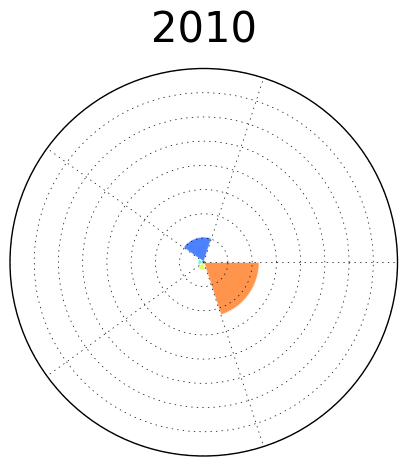

In [46]:
#plotting a test chart

fig = plt.figure(figsize=(5,5))
plt.subplot(1,1,1,polar=True)
graph(0,2010)

plt.show()


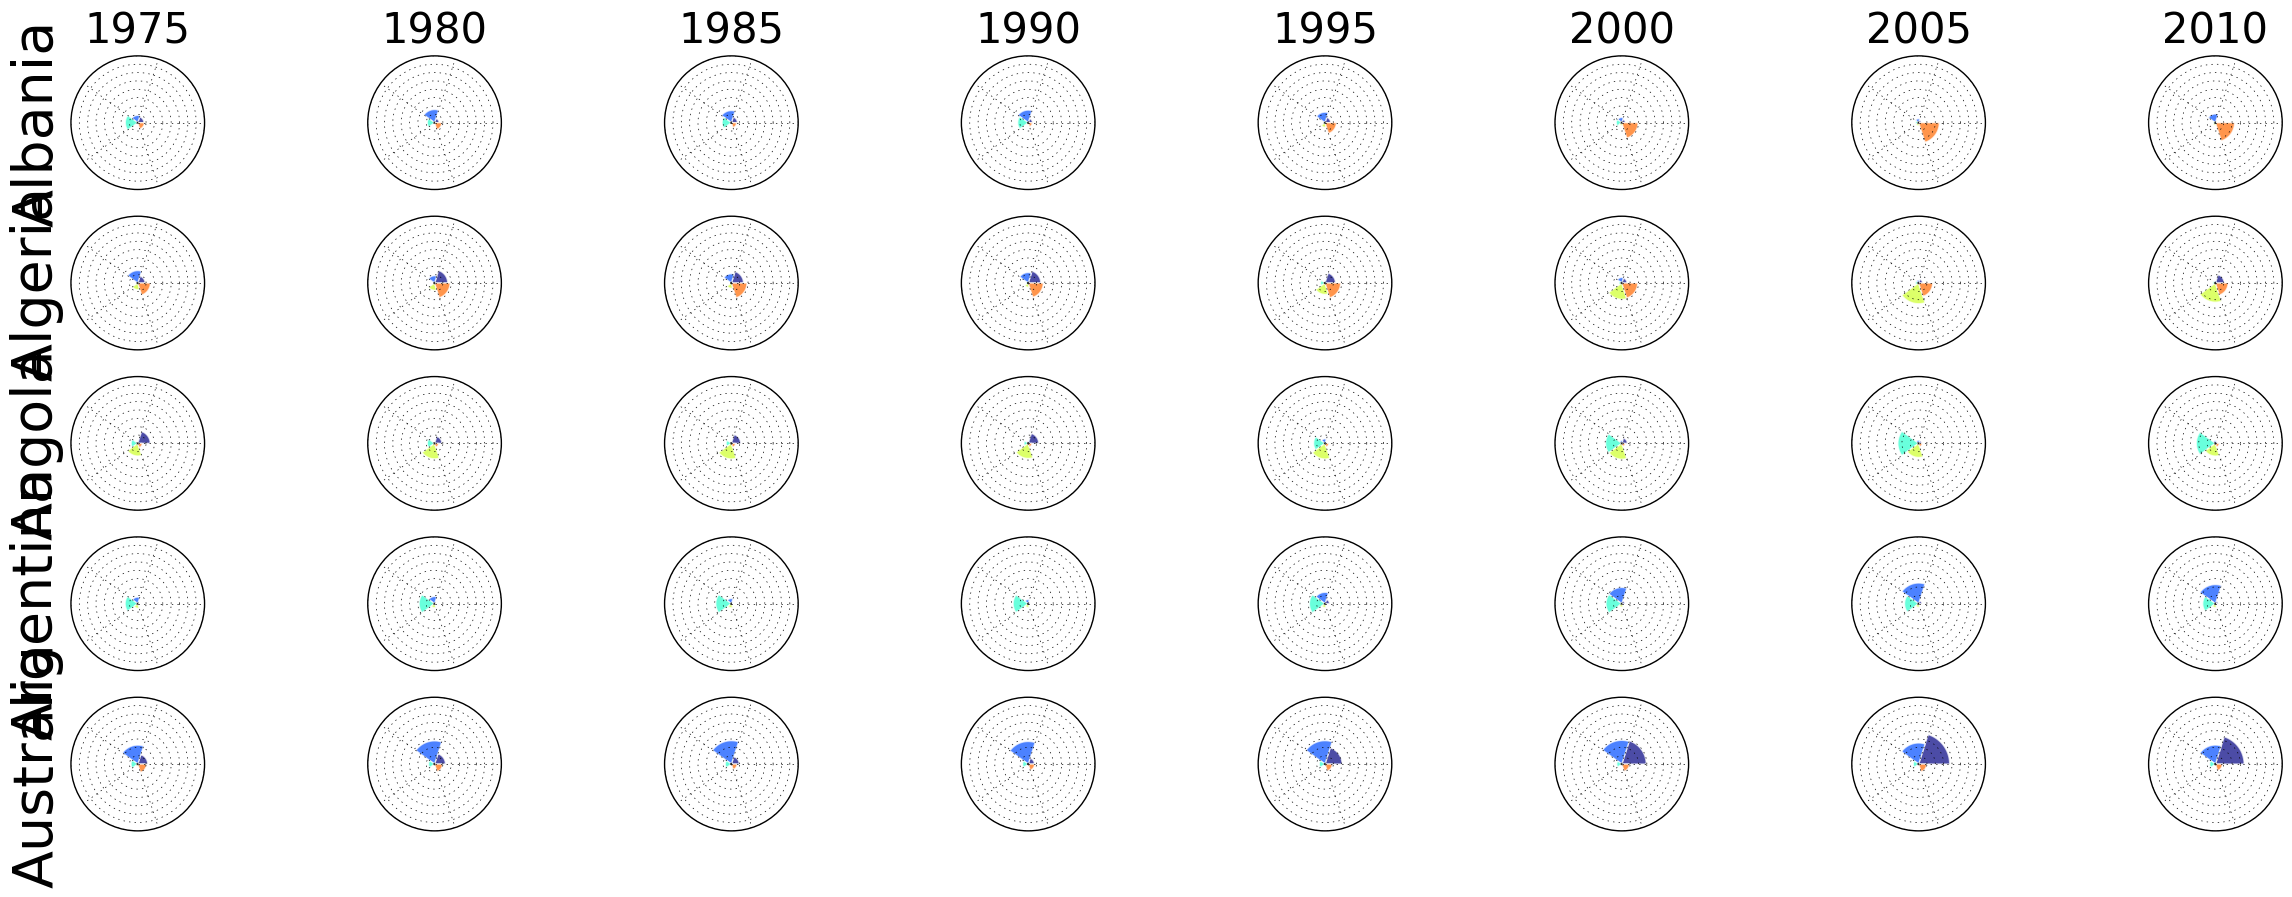

In [47]:
#Creating a loop to iterate through the subplots and create a table of graphs

#number of columns and rows
columns=8
rows=5


year=1975
fig = plt.figure(figsize=(30,10))     
for j in range(columns):
    for k in range(rows):
        plt.subplot(rows,columns,j+k*columns+1,polar=True)
        graph(k,year+j*5)
        
            
plt.show() 

In [48]:
#the polar charts were not adequate enough to represent all the data so it was dismissed. The charts were too small for the data to be read

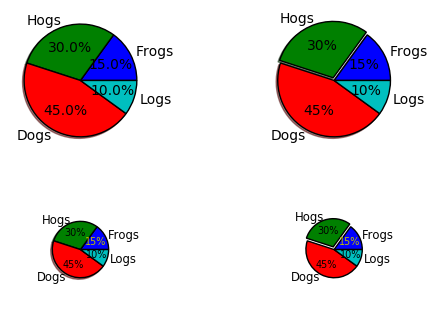

In [49]:
#Plotting pie charts example, taken unchanged by: http://matplotlib.org/api/pyplot_api.html

"""
Make a pie charts of varying size - see
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie for the docstring.

This example shows a basic pie charts with labels optional features,
like autolabeling the percentage, offsetting a slice with "explode"
and adding a shadow, in different sizes.

"""
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Some data

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

explode = (0, 0.05, 0, 0)

# Make square figures and axes

the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 0], aspect=1)

plt.rcParams['text.color'] = 'black'

plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

plt.subplot(the_grid[0, 1], aspect=1)

plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)

plt.subplot(the_grid[1, 0], aspect=1)

patches, texts, autotexts = plt.pie(fracs, labels=labels,
                                    autopct='%.0f%%',
                                    shadow=True, radius=0.5)

# Make the labels on the small plot easier to read.
for t in texts:
    t.set_size('smaller')
for t in autotexts:
    t.set_size('x-small')
autotexts[0].set_color('y')

plt.subplot(the_grid[1, 1], aspect=1)

# Turn off shadow for tiny plot with exploded slice.
patches, texts, autotexts = plt.pie(fracs, explode=explode,
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=0.5)
for t in texts:
    t.set_size('smaller')
for t in autotexts:
    t.set_size('x-small')
autotexts[0].set_color('y')

plt.show()

In [50]:
#based on the example above, a function has been created to create a pie chart

def graphpie(countrycode,year):
    data=[]
    count=0
    name=dfCO2Total.loc[countrycode, str('Country Code')] 
    
    #creating 3 categories of chart size for different CO2 emmissions values 
    if (dfCO2Total.loc[(countrycode), str(year)])>25:
        div=1.25
    else:
        if (dfCO2Total.loc[(countrycode), str(year)])<=10:
            div=0.75
        else:
            div=1
    
   
    
        
    #creating set of datas for each year
    data = np.array([dfCO2Percentage.loc[countrycode, str(year)], 
                     dfCO2Percentage.loc[countrycode+1, str(year)],
                     dfCO2Percentage.loc[countrycode+2, str(year)],
                     dfCO2Percentage.loc[countrycode+3, str(year)],
                     dfCO2Percentage.loc[countrycode+4, str(year)]])  
    
    #setting colors for each category
    colors = ['#586BA4', '#324376', '#F5DD90', '#F68E5F','#F76C5E']
    
    #creating the plot
    plt.pie(data, autopct='%1.1f%%', shadow=False, radius=div,colors=colors)
    
    #setting text parameters
    plt.rcParams['text.color'] = 'white'
    plt.rcParams['font.size'] = 10

    
    #creating appropriate titles
    if countrycode == 0: 
        plt.title(str(year), fontsize=40, ha='center', color='black')
    plt.xlabel(str('CO2 emissions: ' + str((dfCO2Total.loc[(countrycode), str(year)]))+ ' (metric tons per capita)'),fontsize=10,ha='center', color='black')
    if year == 1975:    
        #plt.annotate(name, xy=(0,0),xytext=(0, 0.6), textcoords='figure fraction', rotation=90,fontsize=40)
        plt.ylabel(name,rotation=90,fontsize=30,visible = True)
    
    
    plt.plot()      

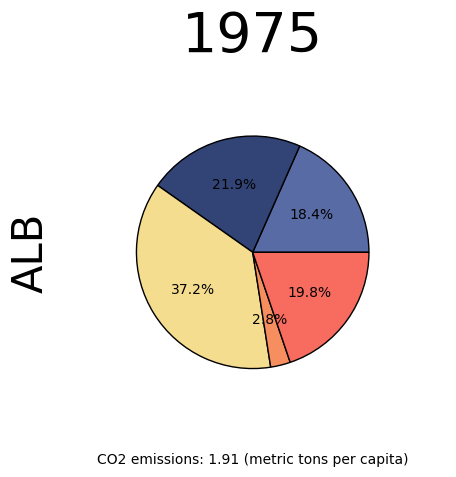

In [51]:
#creating a test plot

fig = plt.figure(figsize=(5,5))
plt.subplot(1,1,1, aspect=1)
graphpie(0,1975)

plt.show()


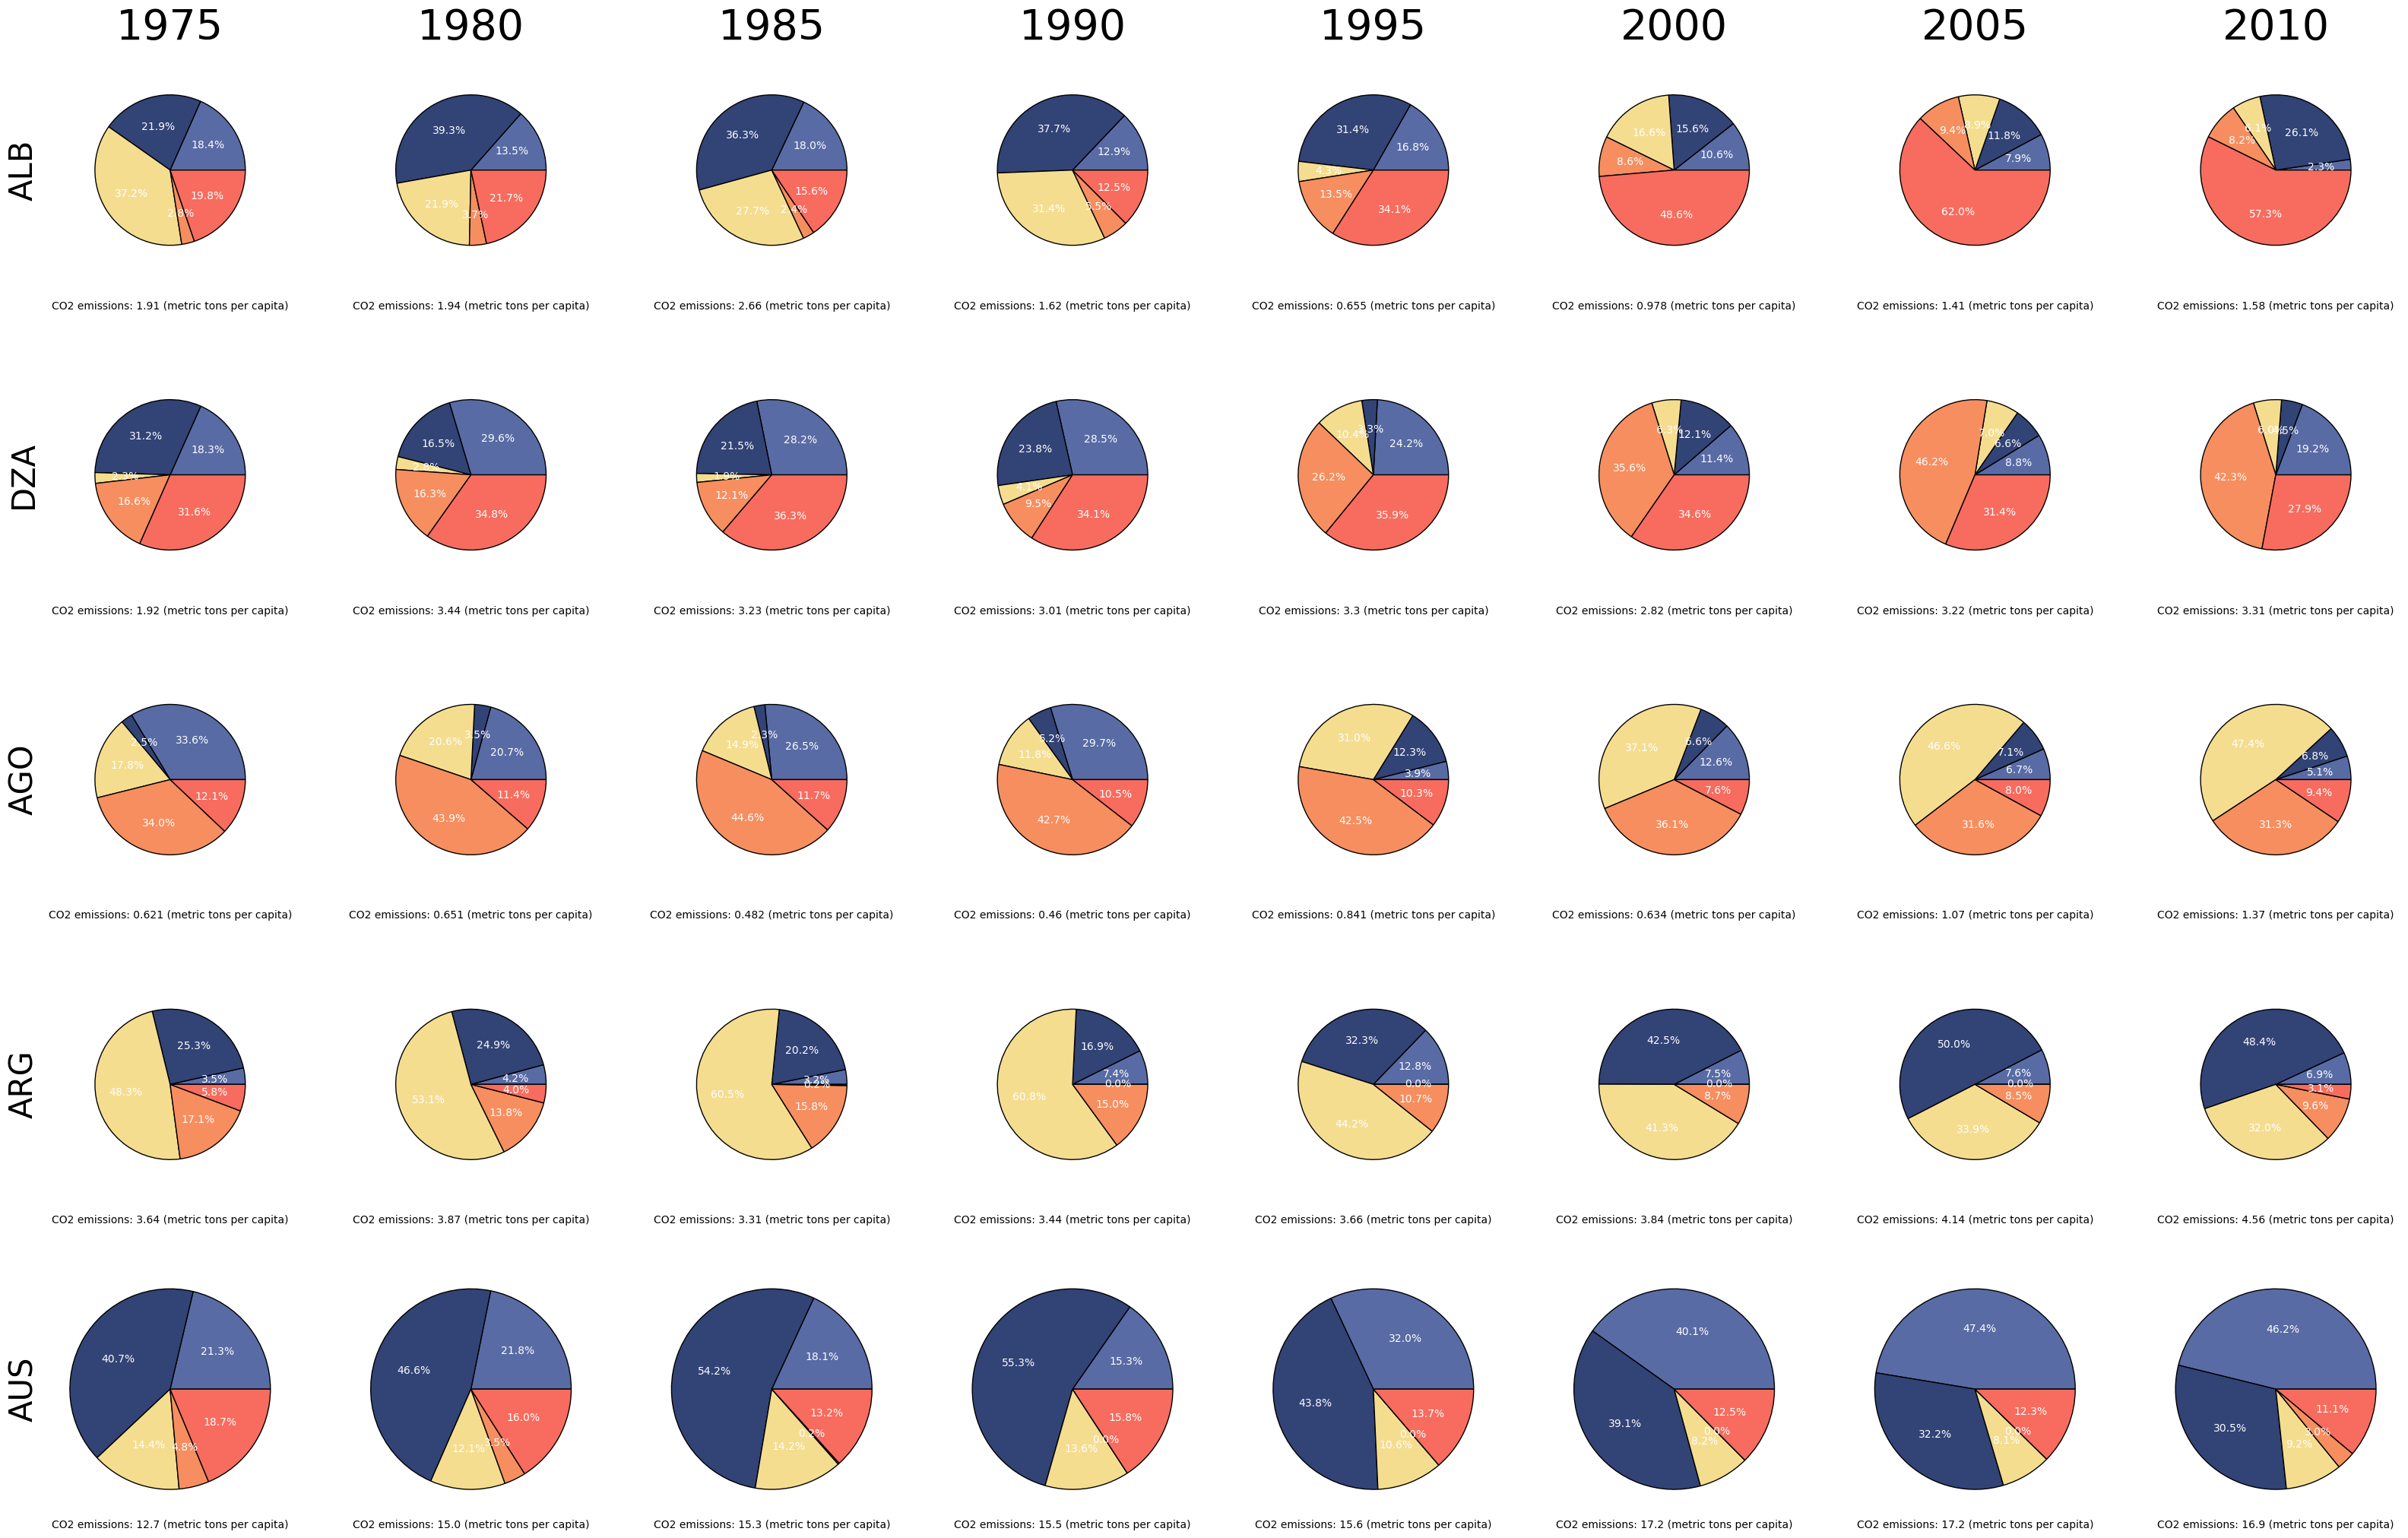

In [ ]:
#A test plot (5 rows) with multiple countries is plotted here.

columns=8
rows=5

year=1975
fig = plt.figure(figsize=(columns*5,rows*5))   #appropriate space for each subplot is given
         
#a loop that iterates through all the positions of the plot(subplots) and calls the function to create the graph  
       
for j in range(columns):
    for k in range(rows):
        plt.subplot(rows,columns,j+k*columns+1, aspect=1)
        graphpie(k,year+j*5)
        
            
plt.show() 

In [ ]:
#The final plot is created here and saved into an external file.

columns=8 
rows=int((len(dfCO2Total)))   #number of rows is calculated, based on the columns

year=1975
fig = plt.figure(figsize=(columns*5,rows*5))
       
for j in range(columns):
    for k in range(rows):
        plt.subplot(rows,columns,j+k*columns+1, aspect=1)
        graphpie(k,year+j*5)
        
            
plt.savefig('CO2 emmisions plot 25.png',dpi = (130)) #the plot is saved as a png

# The final chart of the CO2 Emmisions  Data: 

![](https://dl.dropboxusercontent.com/u/77875284/CO2%20emmisions%202.jpg)